<a href="https://colab.research.google.com/github/daniela-estevez/ProyectoIntegrador/blob/main/Avance3_13Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avance 3. Baseline

## Equipo 13

## Alejandro García Hernández A01793812
## Daniela Estevez Rodriguez A01793723
## Carlos Alberto López Álvarez A01168193

## Antecedentes

Tomando en cosideración los comentarios recibidos en la entrega anterior, renombramos las variables de A's y B's y realizamos un mayor análsis sobre la relación de las variables de entrada y salida.
<br><br>
Sobre el último comentario sobre no haber aplicado ningún preprocesamiento en la entrega anterior, tuvimos un malentendido sobre lo que debíamos entregar y en esta entrega ya estamos realizando adecuaciones a la base.
<br><br>
De igual manera, si validaremos las variables finales para el modelo con los doctores antes de proceder a buscar el modelo adecuado.

## Objetivos

Para esta etapa del proyecto, el objetivo es contar con una base óptima para que el(los) modelo(s) tengan el mejor rendimiento posible. Así, en esta etapa el trabajo se centra en seleccionar las variables que, a nuestro criterio, aporten mayor información, de ser necesesario se puede optar con construir nuevas características a partir de las ya existentes, reducir la cardinalidad de la base, etc. Con lo anterior, también se mitiga el riesgo de características sesgadas o correlacionadas y con ello, se puede acelerar la convergencia de los modelos seleccionados.

### 1. Depuración de características

In [ ]:
#librerias a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# El siguiente bloque se agregó para poder leer los archivos drive
#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/MyDrive/Colab Notebooks/Proyecto Integrador

In [ ]:
data = pd.read_csv("base.csv",sep=",", encoding="latin1")
df= data.copy()

In [ ]:
# Para tener en mente la base inicial, observamos que cuenta con 380 renglones,
# 115 características y las etiquetas

print(f"Hay {df.shape[0]} filas y {df.shape[1]} columnas.")

Hay 380 filas y 116 columnas.


#### 1.1 Características irrelevantes por el origen de información contenida

Como se observó en el primer avance del proyecto existen algunas características que pueden eliminarse dado que el contenido de las mismas es irrelevante para el actual estudio. Dichas caracteristicas son:

-> Nombre y residencia. Ya que no dan información relevante.

-> fecha_nacimiento y fecha_1er_visita. Ya que esta información esta contenida en edad_1er_visita.

-> FECHA_INICIO_ACTUAL_EPISODIO. Ya que esta información está contenida en EDAD_INICIO_1er_EPISODIO.

In [ ]:
#Eliminamos entonces estas características
df = df.drop(["Nombre","residencia","fecha_nacimiento","fecha_1er_visita","FECHA_INICIO_ACTUAL_EPISODIO"], axis=1)

#### 1.2 Características con datos faltantes

Se eliminarán todas las características que solo contengan valores nulos

In [ ]:
#Eliminamos las columnas vacias
df = df.dropna(axis=1, how='all')

Si bien, existen diversos métodos para imputar valores faltantes en la base, esta imputación es peligrosa y puede sesgar los resultados si se realiza en variables en donde la mayoría de sus resgistros reportan valores faltantes, ya que los datos imputados podrían no ser representativos de la verdadera distribución de los datos. Por lo anterior es conveniente eliminar aquellas características en donde al menos el 40% de sus valores son nulos.

In [ ]:
# Calculamos el porcentaje de valores nulos en cada columna
null_percentage = (df.isnull().sum() / len(df)) * 100

# Con el sguiente código, se crea un DataFrame con los porcentajes de valores nulos
null_df = pd.DataFrame({'Columna': null_percentage.index, 'Porcentaje_Null': null_percentage.values})

# Filtramos el DataFrame para mantener solo las columnas donde el porcentaje de valores nulos sea menor al 40%
columnas_a_mantener = null_df[null_df['Porcentaje_Null'] < 40]['Columna']

# Filtramos el DataFrame original para mantener solo las columnas que queremos conservar
df = df[columnas_a_mantener]

In [ ]:
#Observamos que hasta este momento hemos eliminado ya 44 características
print(f"Hay {df.shape[0]} filas y {df.shape[1]} columnas.")

Hay 380 filas y 72 columnas.


#### 1.3 Verificamos registros con datos faltantes

Ya que se eliminaron las variables que superaban el criterio de datos faltantes, ahora procedemos a revisar el máximo porcentaje de datos faltantes por registro.

In [ ]:
# Calculamos el porcentaje de valores nulos en cada fila
null_percentage = (df.isnull().sum(axis=1) / df.shape[1]) * 100

# Con el siguiente código, se crea un DataFrame con los porcentajes de valores nulos por fila
null_percentage.values.max()

12.5

Se observa que no hay registro con un porcentaje alto de datos faltantes, el máximo  es 12%.


#### 1. Variables que reportan el mismo valor en todos sus registros

De igual forma, en el primer avance del proyecto, observamos variables que reportan un solo valor en todos los registros. Dado que estas características no aportarán ninguna información al modelo, deben de eliminarse

In [ ]:
#Primero obtenemos las variables que reportan un solo valor y mostramos sus nombres
unique_counts = df.nunique()
columnas_a_eliminar = unique_counts[unique_counts == 1].index
columnas_a_eliminar

Index(['A4_MALESTAR_PROBLEMAS_RELACIONES_INTERPERSONALES',
       'CONDUCTA_SUICIDA_REMISION_TEMPRANA',
       'B4_VOCES_SUEniOS_INTENCION_SUICIDA', 'B6_PENSO_MEDIO_SUICIDARSE',
       'B7_PENSO_LUGAR_SUICIDIO', 'B9_PENSO_FINALIZAR_ALGO_ANTES_SUICIDIO',
       'B11_INTENSION_MORIR_EN_SUICIDIO',
       'B12_NECESIDAD_MORIR_ANTES_PLAN_SUICIDIO',
       'B13_DIFICULTAD_RESISTIR_IMPULSO_SUICIDIO', 'B14_INTENTO_MORIR',
       'B14a_INICIO_ACCIONES_INTENTO_SUICIDIO',
       'B14b_INICIO_ACCIONES_INTENTO_SUICIDIO_SIN_LASTIMARSE',
       'B14c_INICIO_ACCIONES_INTENTO_SUICIDIO_LO_DETUVIERON',
       'B15_SE_LESIONO_SIN_SUICIDIO', 'B16_INTENTO_SUICIDARSE',
       'B16a_COMENZO_INTENTO_SUICIDIO_SIN_FINANALIZAR',
       'B16b_COMENZO_INTENTO_SUICIDIO_LO_INTERRUMPIERON',
       'B16c_TERMINO_INTENTO_SUICIDIO',
       'B17_TIEMPO_DEDICADO_A_PENSAMIENTO_SUICIDA',
       'B19_POSIBILIDAD_SUICIDARSE_TRES_MESES_SIGUIENTES',
       'B_tot_SI_ALGUNA_PREGUNTA_B'],
      dtype='object')

In [ ]:
#y procedemos a elimnarlas de la base
df = df.drop(columns=columnas_a_eliminar)

In [ ]:
#Observamos que ahora ya hemos eliminado 65 características
print(f"Hay {df.shape[0]} filas y {df.shape[1]} columnas.")

Hay 380 filas y 51 columnas.


### 2 Imputación de valores

#### 2.1 Verificar el tipo de dato por variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SEXO                                         380 non-null    object 
 1   EDAD_1era_visita                             378 non-null    float64
 2   CONDICION_ACTUAL                             356 non-null    object 
 3   EDAD_INICIO_1er_EPISODIO                     371 non-null    float64
 4   ESTADO_civil                                 370 non-null    object 
 5   RELIGION                                     344 non-null    object 
 6   PROVEEDOR_FAMILIAR                           354 non-null    object 
 7   OCUPACIoN_JEFE_FAMILIA                       330 non-null    object 
 8   ESCOLARIDAD__JEFE_FAMILIA                    311 non-null    object 
 9   ESCOLARIDAD_MAXIMA_PX                        231 non-null    object 
 10  An

In [ ]:
binary_columns = []
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 2 and all(value in [0, 1] for value in unique_values):
        binary_columns.append(column)

# Número de columnas con solamente 0's o 1's
print("Numero de columnas binarias encontradas:", len(binary_columns))

Numero de columnas binarias encontradas: 26


In [ ]:
# Actualizamos el tipo de las columnas binarias a booleano usando astype()
for column in binary_columns:
    df[column] = df[column].astype(bool)

In [ ]:
# Lista de variables que son en realidad categóricas
cat_cols=["SEXO","CONDICION_ACTUAL","ESTADO_civil","RELIGION","PROVEEDOR_FAMILIAR","OCUPACIoN_JEFE_FAMILIA","ESCOLARIDAD__JEFE_FAMILIA",
         "ESCOLARIDAD_MAXIMA_PX","DX_PRIMARIO","CODIGO_DX.1","CGI-S.1","EPISODIO_DEPRESIVO_MAYOR_RECURRENTE","TRASTORNO_MAYOR_DIAGNOSTICO",
         "Riesgo_suicidio","Sintomas_ansiosos"]

# Actualizamos el tipo de las columnas categoricas usando astype()
for column in cat_cols:
    df[column] = df[column].astype("category")

In [ ]:
# Actualizamos el tipo de la columna MENARCA a uno numérico usando astype()
df["MENARCA"] = df["MENARCA"].astype("float64")

Verificamos que ahora nuestras variables tienen el tipo de dato correcto

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   SEXO                                         380 non-null    category
 1   EDAD_1era_visita                             378 non-null    float64 
 2   CONDICION_ACTUAL                             356 non-null    category
 3   EDAD_INICIO_1er_EPISODIO                     371 non-null    float64 
 4   ESTADO_civil                                 370 non-null    category
 5   RELIGION                                     344 non-null    category
 6   PROVEEDOR_FAMILIAR                           354 non-null    category
 7   OCUPACIoN_JEFE_FAMILIA                       330 non-null    category
 8   ESCOLARIDAD__JEFE_FAMILIA                    311 non-null    category
 9   ESCOLARIDAD_MAXIMA_PX                        231 non-null    cate

-> Nos falta convertir las siguientes variables a entero pero no podemos convertirlas todavía por los NaN: EDAD_1era_visita,EDAD_INICIO_1er_EPISODIO,AnioS_ESTUDIO_PACIENTE,MENARCA,INICIO_VIDA_SEXUAL_ACTIVA,MADRS_TOTAL.

#### 2.2 Inputar valores

Ahora, será importante imputar los valores faltantes en aquellas variables que no fueron eliminadas pero si contenían valores nulos en alguno de sus registros. Para las características categoricas y booleanas se imputará la moda, mientras que para las valores numericas la imputación será con la media.

In [ ]:
# Imputar la moda a las variables numéricas
for columna in df.select_dtypes(include='number').columns:
    df[columna] = df[columna].fillna(df[columna].mean())

# Imputar la moda a las variables booleanas
for columna in df.select_dtypes(include='bool').columns:
    moda = df[columna].mode()[0]  # Calcular la moda
    df[columna] = df[columna].fillna(moda)

# Imputar la moda a las variables alfanuméricas
for columna in df.select_dtypes(include='category').columns:
    moda = df[columna].mode()[0]  # Calcular la moda
    df[columna] = df[columna].fillna(moda)

In [ ]:
# Lista de variables que son en realidad enteros
enteros_cols=["EDAD_1era_visita","EDAD_INICIO_1er_EPISODIO","AnioS_ESTUDIO_PACIENTE","MENARCA","INICIO_VIDA_SEXUAL_ACTIVA","MADRS_TOTAL"]

# Actualizamos el tipo de las columnas de enteros usando astype()
for column in enteros_cols:
    df[column] = df[column].astype("int64")

Verificamos que ahora nuestras variables tienen el tipo de dato correcto

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   SEXO                                         380 non-null    category
 1   EDAD_1era_visita                             380 non-null    int64   
 2   CONDICION_ACTUAL                             380 non-null    category
 3   EDAD_INICIO_1er_EPISODIO                     380 non-null    int64   
 4   ESTADO_civil                                 380 non-null    category
 5   RELIGION                                     380 non-null    category
 6   PROVEEDOR_FAMILIAR                           380 non-null    category
 7   OCUPACIoN_JEFE_FAMILIA                       380 non-null    category
 8   ESCOLARIDAD__JEFE_FAMILIA                    380 non-null    category
 9   ESCOLARIDAD_MAXIMA_PX                        380 non-null    cate

### 3 Reducción de dimensionalidad

Veremos si existe correlación entre las variables númericas que hemos conservado en la base, con la finalidad de que, en caso de que exista, reducir la dimensionalidad de la base transformando/agrupando las variables correlacionadas en una sola.

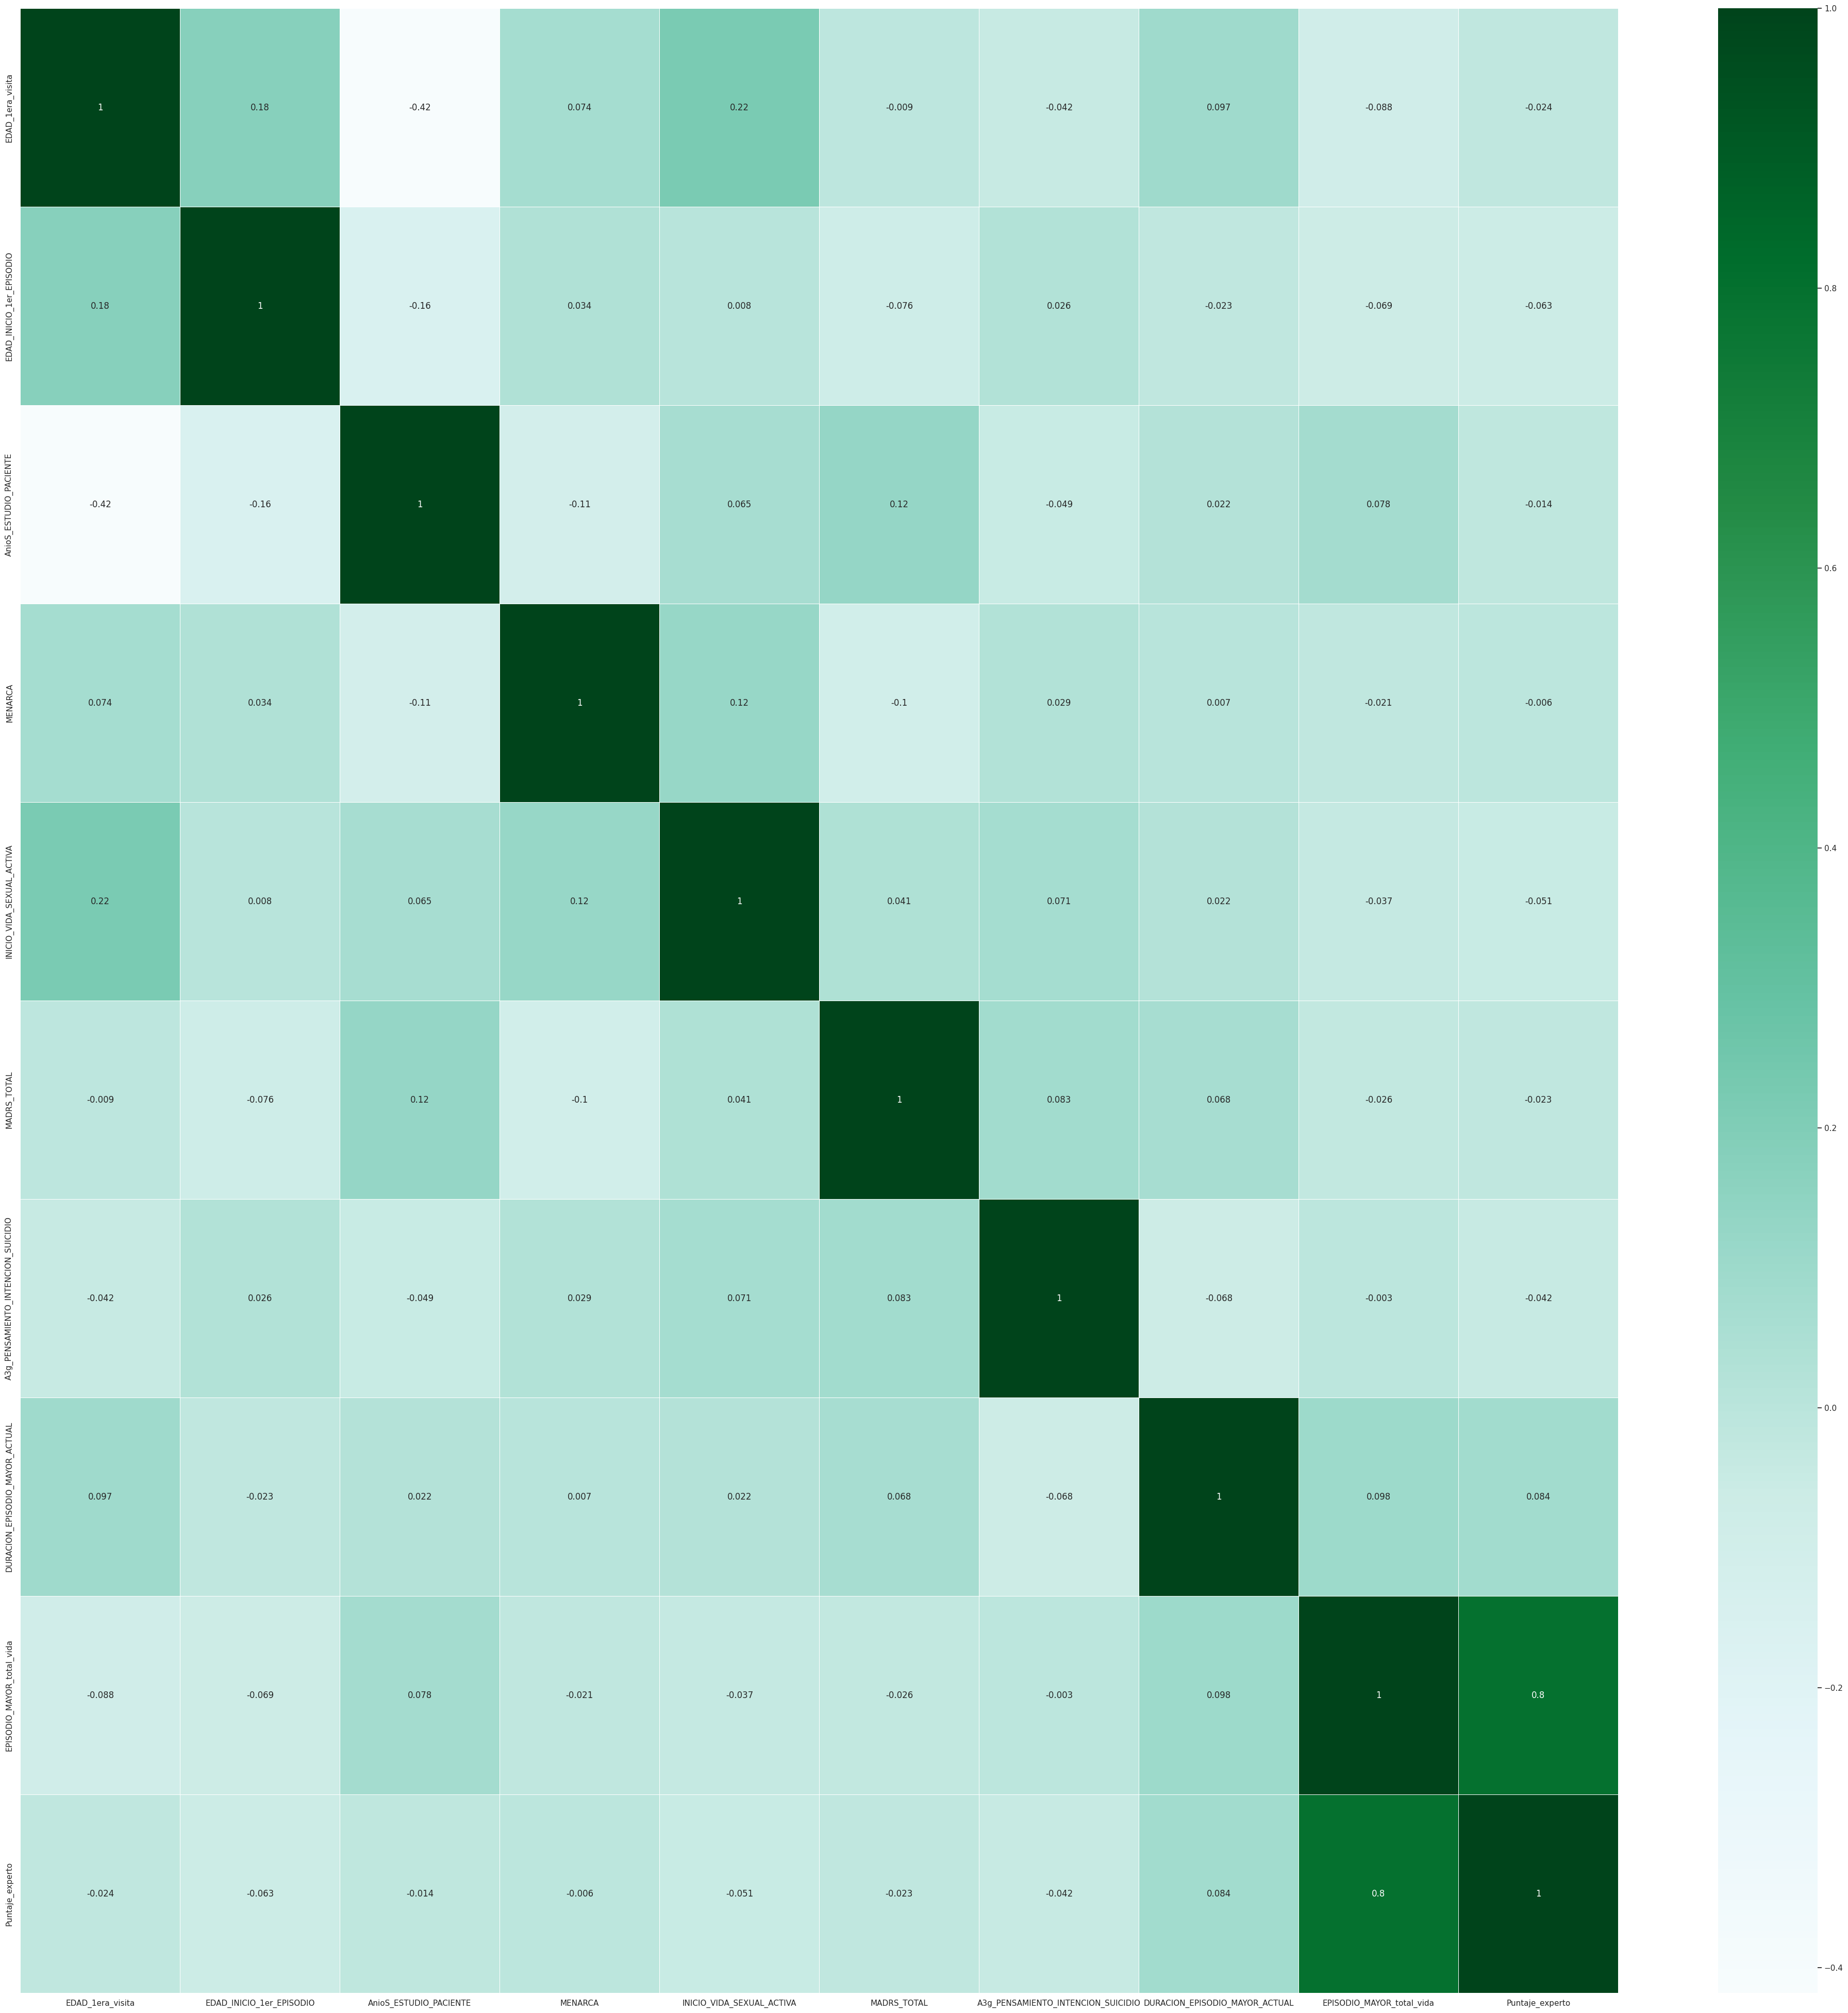

In [ ]:
#Obtenemos las variables numéricas
numericas = df.select_dtypes(include=['int64'])

#Presentamos un heatmap con las correlaciones

sns.set(rc={'figure.figsize':(50,50)})

sns.heatmap(round(numericas.corr(),3), annot = True, cmap= 'BuGn', linewidths= 0.5)

plt.show()

Observamos que EPISODIO_MAYOR_total_vida y Puntaje experto tienen una correlación de .8.<br><br>
Una correlación alta entre variables de entrada puede causarnos problemas para usar algunos modelos o para explicar los resultados.<br><br>
Tomando en consideración que "puntaje_experto" fue asignado en base a las variables de la MINI entre la que se encuentra EPISODIO_MAYOR_total_vida, se optó por eliminar EPISODIO_MAYOR_total_vida

In [ ]:
# Eliminamos estas características
df = df.drop(["EPISODIO_MAYOR_total_vida"], axis=1)

**Mostramos las correlaciones incluyendo las variables bool**

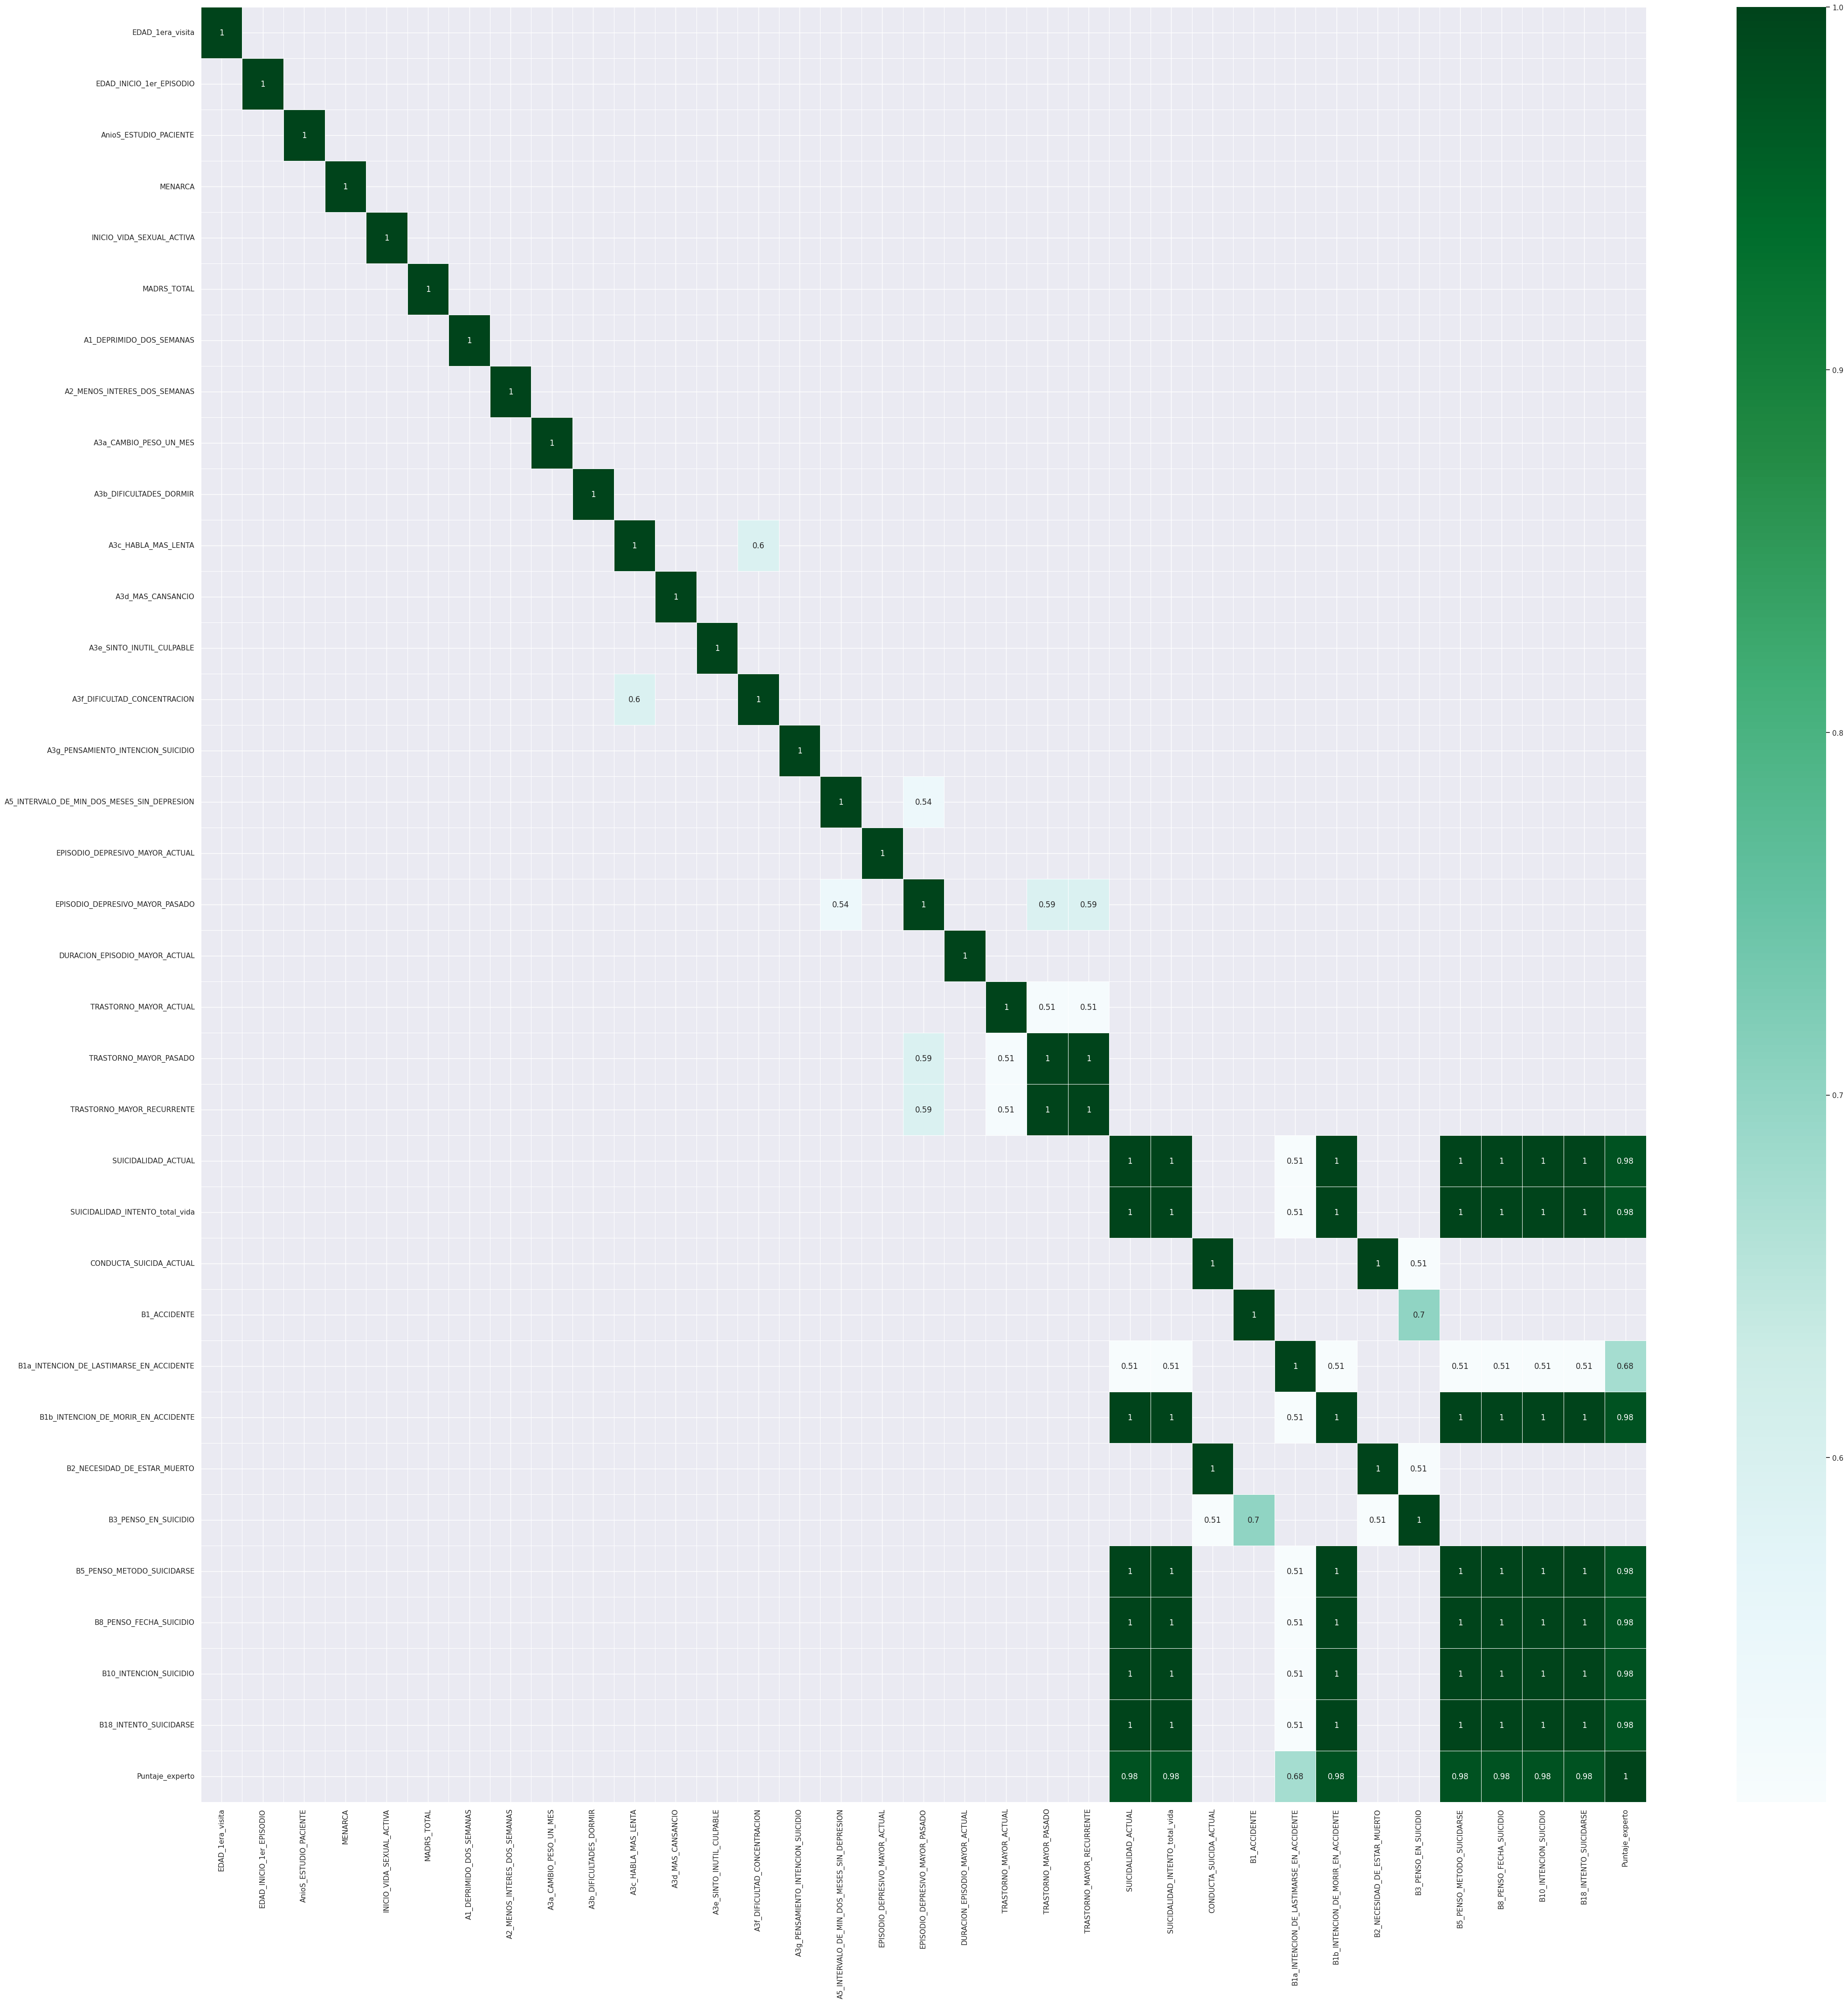

In [ ]:
#Obtenemos las variables numéricas
numericas_tot = df.select_dtypes(include=[bool,'int64'])

# Calculamos la matriz de correlación
corr_matrix = numericas_tot.corr()

# Definimos el umbral de correlación
correlaciones_significativas = corr_matrix[(corr_matrix > 0.5)]

# Generamos el heatmap de las correlaciones filtradas
sns.heatmap(correlaciones_significativas, annot=True, cmap='BuGn', linewidths=0.5);

**Observación 1**<br><br>
Se observan que existen correlaciones altas, de hecho de 1, en las características: SUICIDALIDAD_ACTUAL, SUICIDALIDAD_INTENTO_total_vida, B1b_INTENCION_DE_MORIR_EN_ACCIDENTE, B5_PENSO_METODO_SUICIDARSE, B8_PENSO_FECHA_SUICIDIO, B10_INTENCION_SUICIDIO, B18_INTENTO_SUICIDARSE. <br><br>
Si bien, podríamos utilizar un análisis de componentes principales para ver si podemos capturar a todas estas caractarísticas en una sola componente, observamos que todas estas variables tienen una correlación casi de 1 con la característica de "puntaje_experto". Además, considerando que "puntaje_experto" es el puntaje asignado por un experto en base a las respuestas contenidas en esas variables. Se optó por dejar esta última en la base y eliminar el resto.<br><br>
**Observación 2**<br><br>
Observamos que existe una correlación de 1 entre TRASTORNO_MAYOR_PASADO y TRASTORNO_MAYOR_RECURRENTE y entre CONDUCTA_SUICIDA_ACTUAL y B2_NECESIDAD_DE_ESTAR_MUERTO. <br><br>
Tiene sentido puesto que consideramos que la información de B2_NECESIDAD_DE_ESTAR_MUERTO esta contenida CONDUCTA_SUICIDA_ACTUAL y TRASTORNO_MAYOR_PASADO esta muy relacionado con TRASTORNO_MAYOR_RECURRENTE.<br><br>
Decidimos eliminar B2_NECESIDAD_DE_ESTAR_MUERTO y TRASTORNO_MAYOR_PASADO.

In [ ]:
# Eliminamos estas características
df = df.drop(["SUICIDALIDAD_ACTUAL","SUICIDALIDAD_INTENTO_total_vida","B1b_INTENCION_DE_MORIR_EN_ACCIDENTE","B5_PENSO_METODO_SUICIDARSE",
              "B8_PENSO_FECHA_SUICIDIO","B10_INTENCION_SUICIDIO","B18_INTENTO_SUICIDARSE","B2_NECESIDAD_DE_ESTAR_MUERTO","TRASTORNO_MAYOR_PASADO"],
             axis=1)

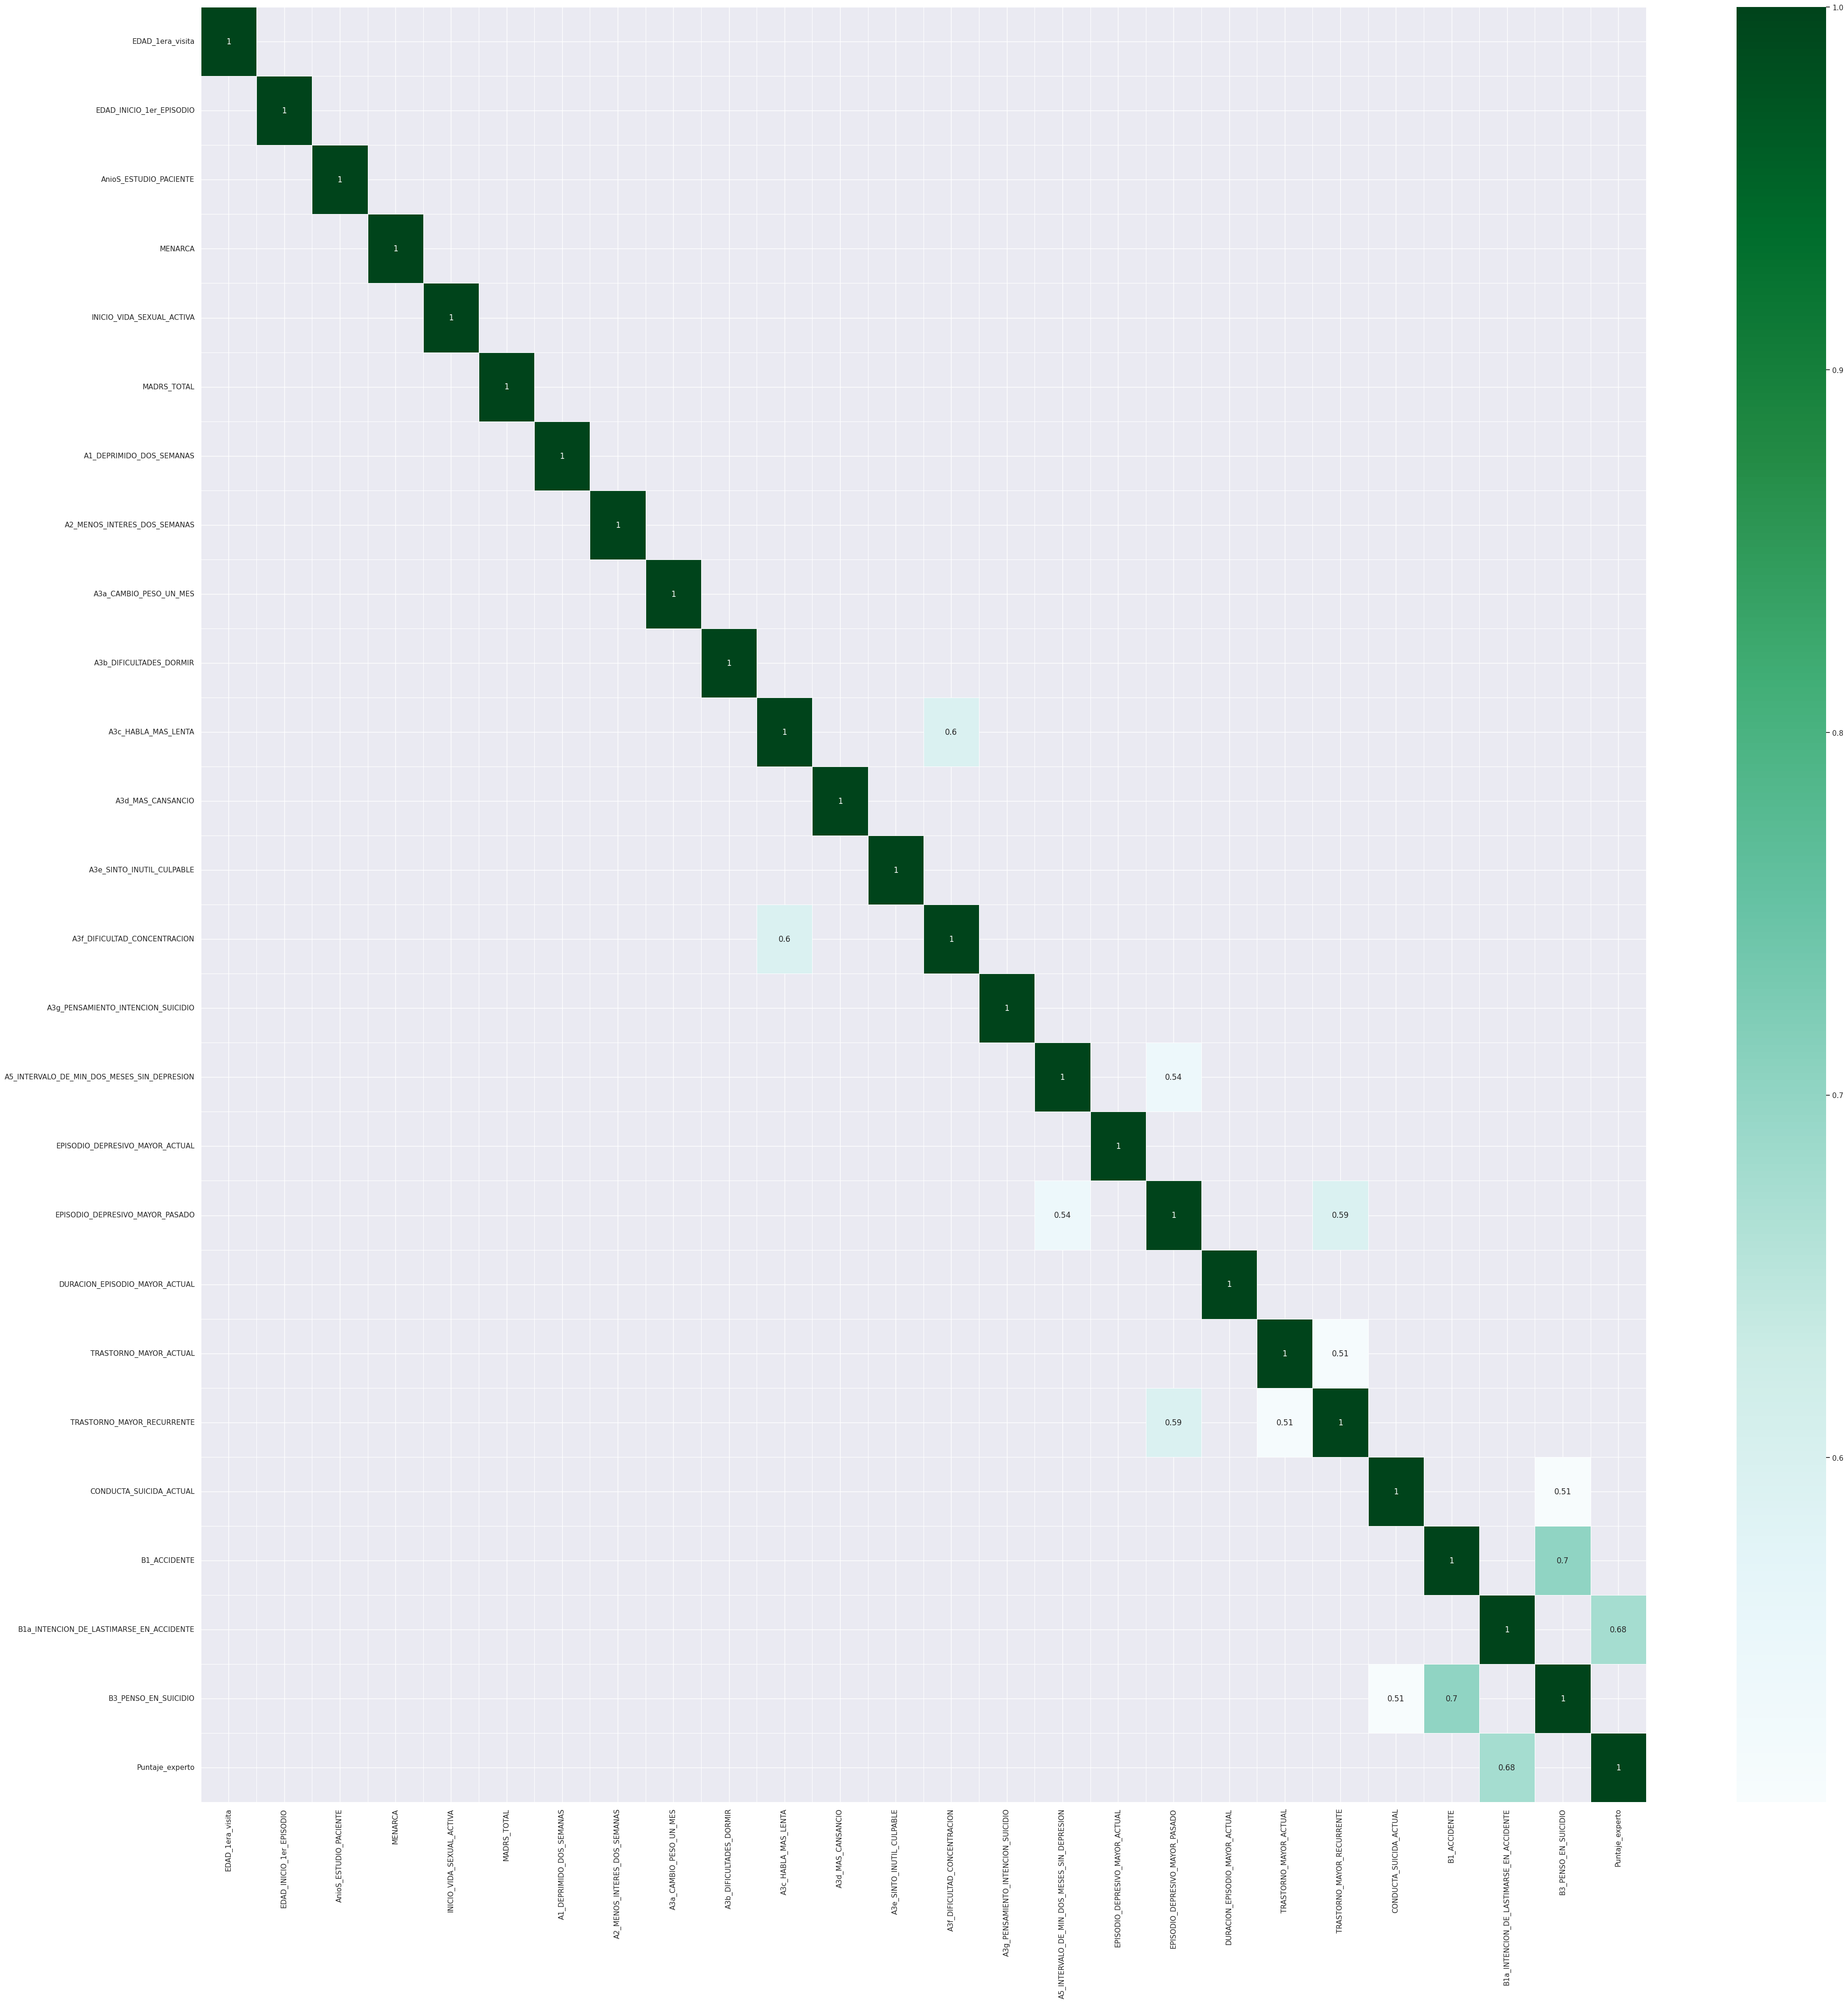

In [ ]:
#Obtenemos las variables numéricas
numericas_tot_2 = df.select_dtypes(include=[bool,'int64'])

# Calculamos la matriz de correlación
corr_matrix = numericas_tot_2.corr()

# Definimos el umbral de correlación
correlaciones_significativas = corr_matrix[(corr_matrix > 0.5)]

# Generamos el heatmap de las correlaciones filtradas
sns.heatmap(correlaciones_significativas, annot=True, cmap='BuGn', linewidths=0.5);

Todavía hay algunas variables con una correlación signficativa, sin embargo, consideramos que podemos trabajar así, puesto que usaremos algún modelo que no se afecte facilmente por multicolinealidad como Árboles de decisión, Random Forest, Modelos basados en regresión regularizados como regresión ridge y regresión LASSO, Máquinas de vectores de soporte (SVM), Modelos de ensambles como Gradient Boosting y XGBoost, etc

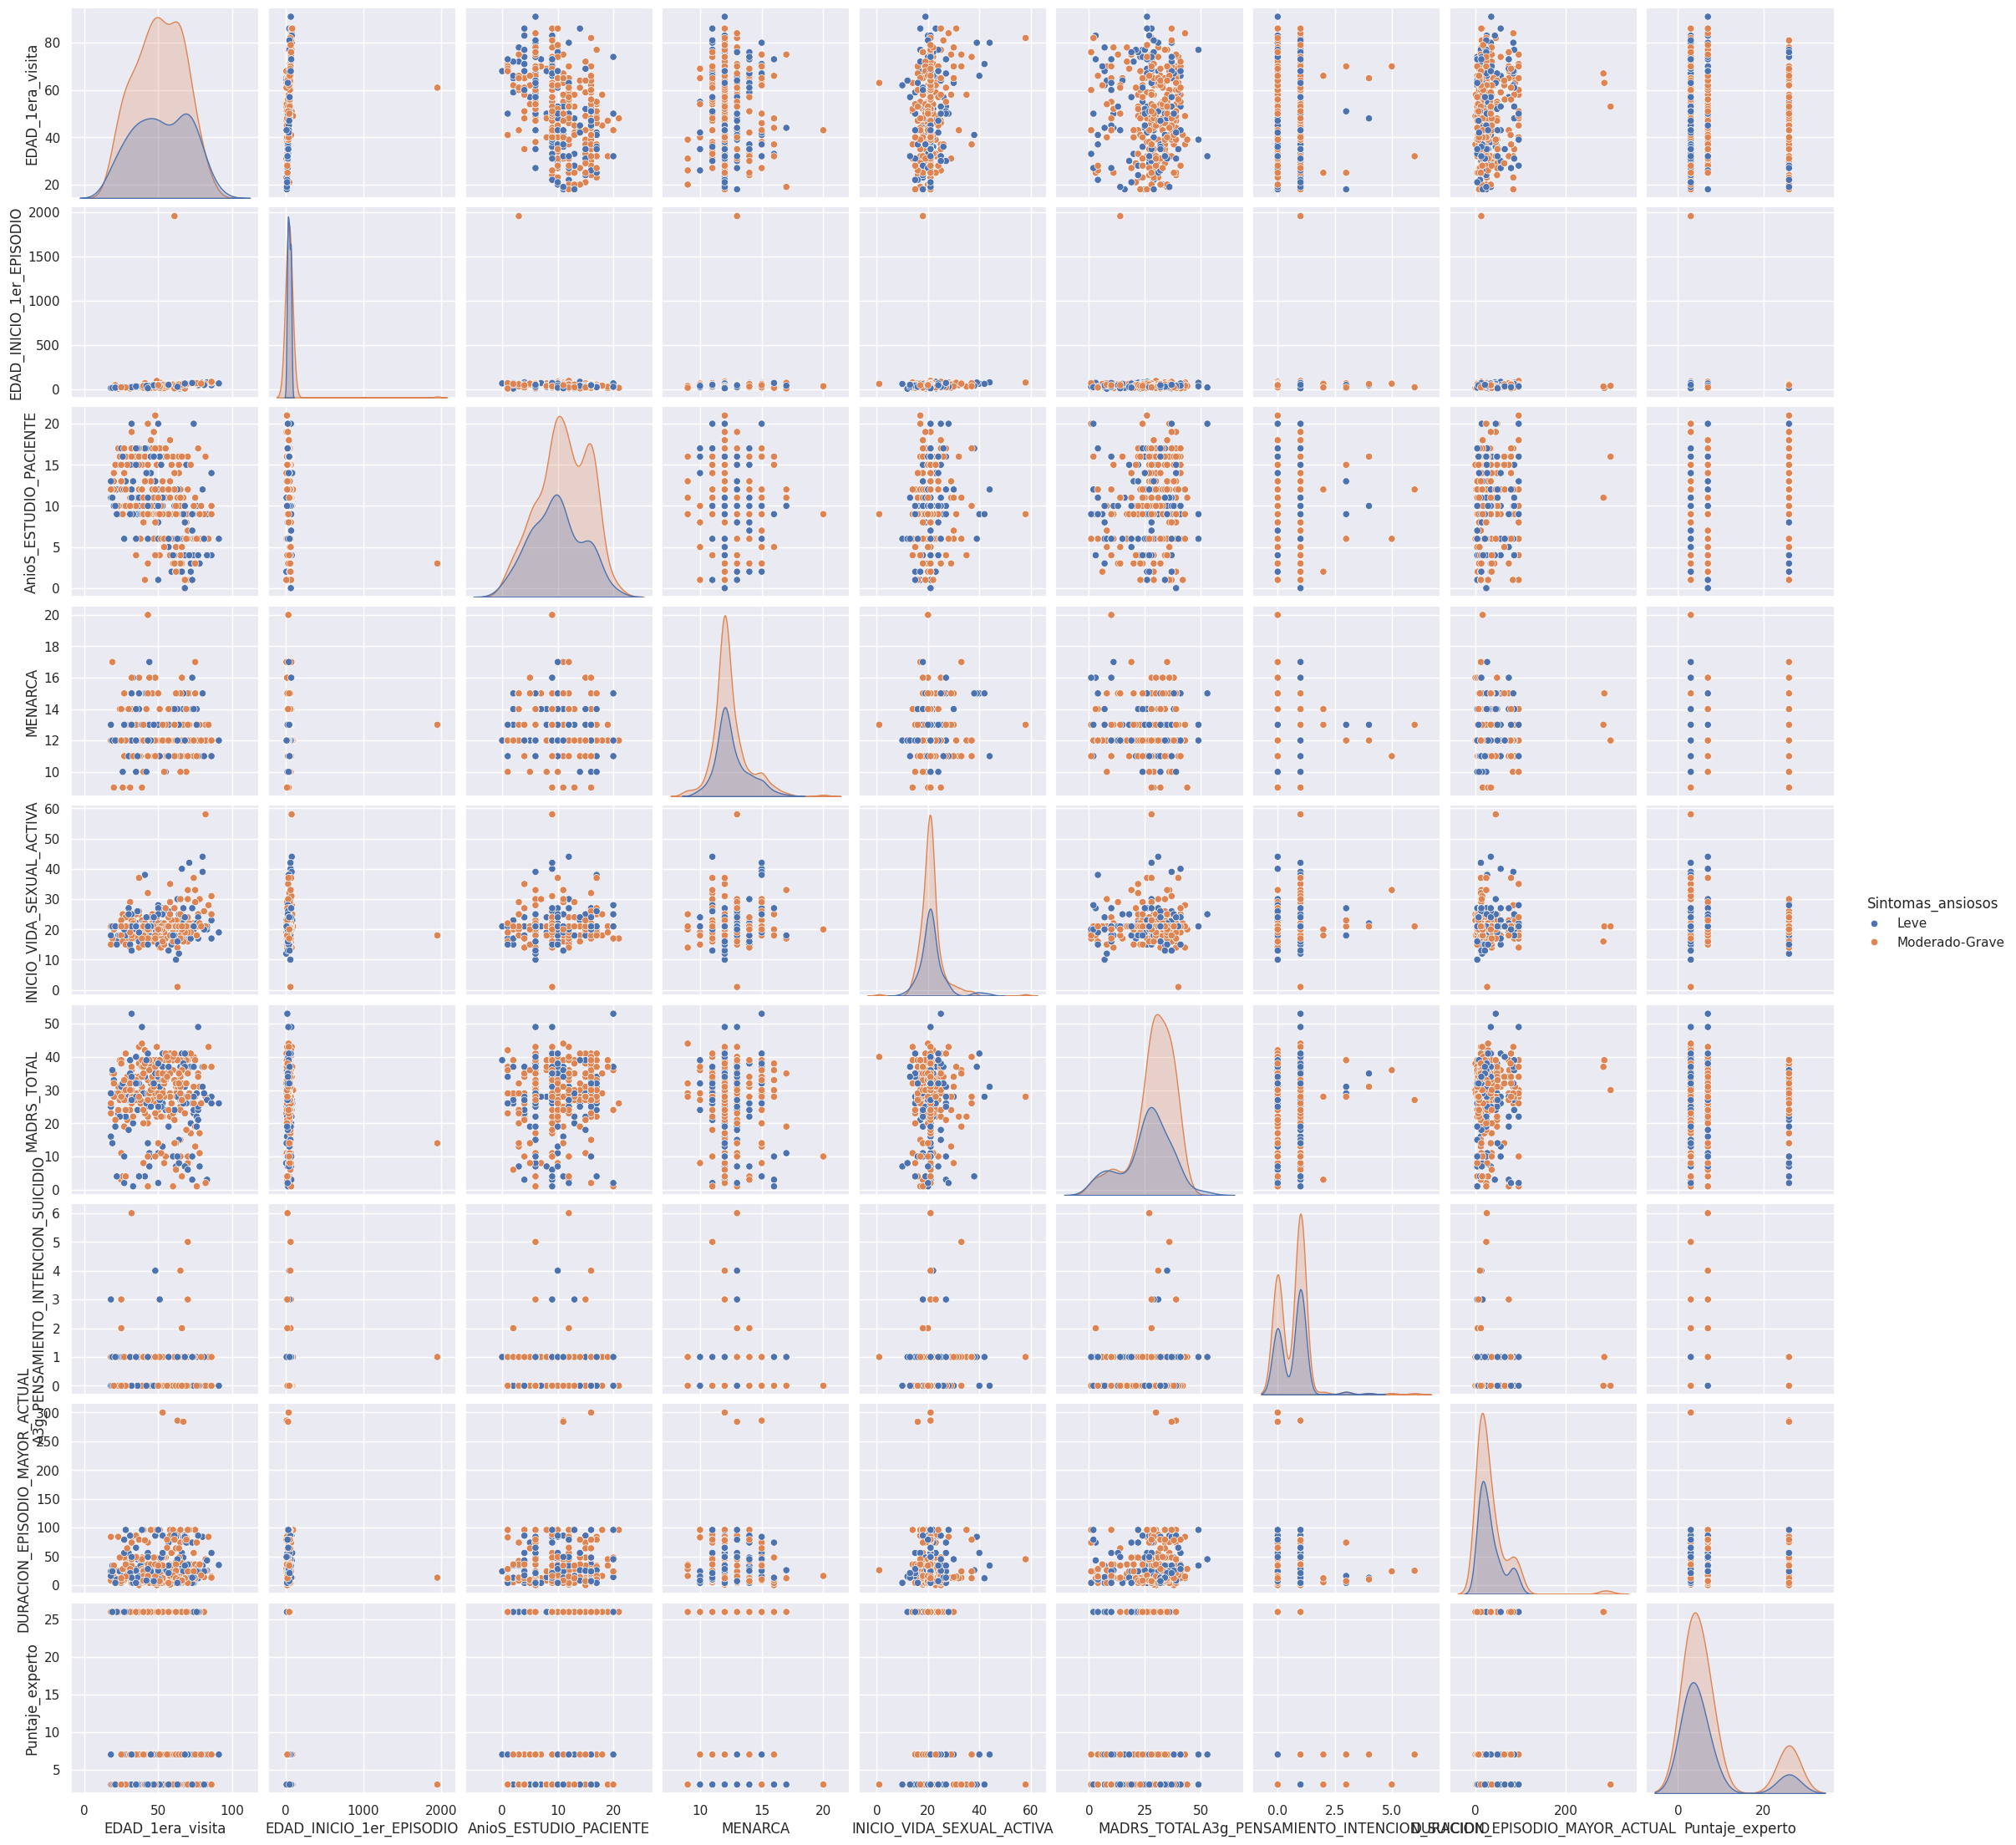

In [ ]:
# Creamos subconjunto para usar pairplot y ver relación entre variables numéricas de entrada y variable de salida.
pairplot_num_df = df.select_dtypes(include=['int64'])
pairplot_num_df['Sintomas_ansiosos']=df['Sintomas_ansiosos']

# Creamos pairplot
sns.pairplot(pairplot_num_df, hue='Sintomas_ansiosos');

Podemos observar en las distribución si hay diferencias para el valor Leve, Moderado-Grave de la variable "Sintomas_ansiosos" que es la variable de salida.<br>
Esto nos da un indicador de que posiblemente podamos encontrar un modelo para predecir la variable con las variables numéricas.

**Pairplot varibles bool**

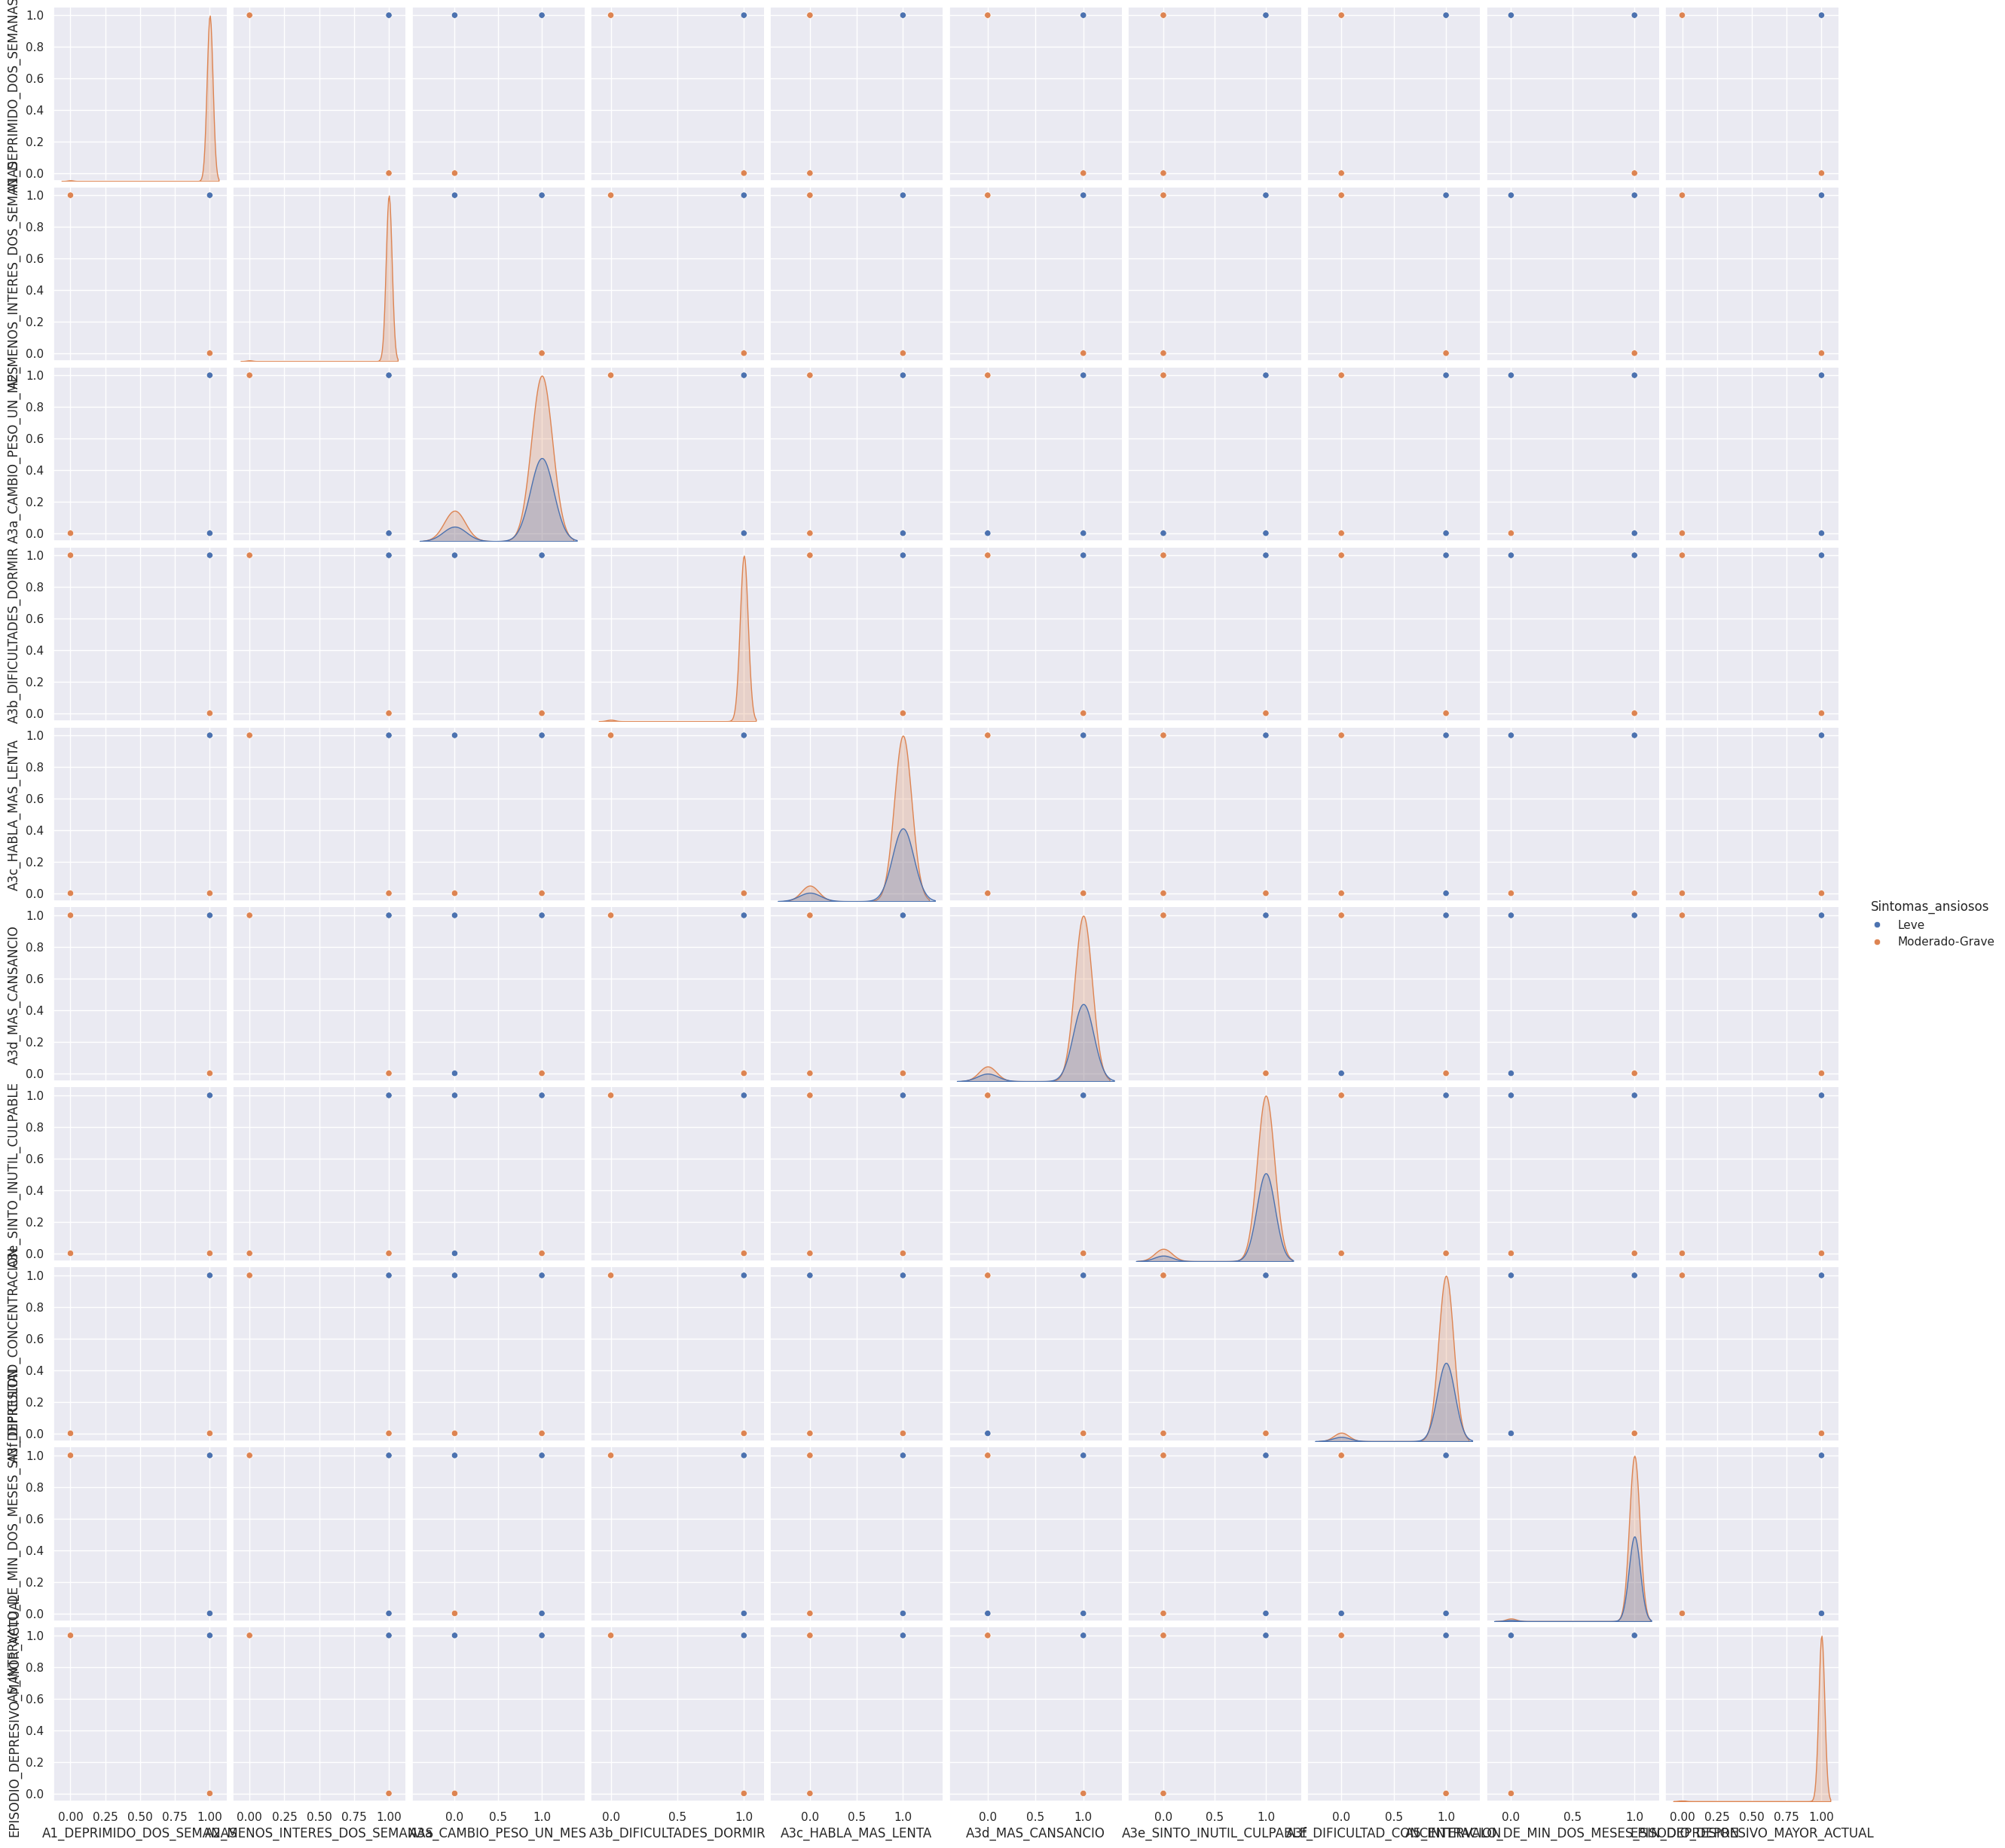

In [ ]:
# Creamos subconjunto para usar pairplot y ver relación entre variables numéricas de entrada y variable de salida.
pairplot_bool_df = df.select_dtypes(include=[bool])
pairplot_bool_df_1=pairplot_bool_df.iloc[:, :10].copy()
pairplot_bool_df_1['Sintomas_ansiosos']=df['Sintomas_ansiosos']

# Creamos pairplot
sns.pairplot(pairplot_bool_df_1, hue='Sintomas_ansiosos');

Podemos observar en las distribución si hay diferencias para el valor Leve, Moderado-Grave de la variable "Sintomas_ansiosos" que es la variable de salida.<br>
Esto nos da un indicador de que posiblemente podamos encontrar un modelo para predecir la variable con las variables bool presentadas.

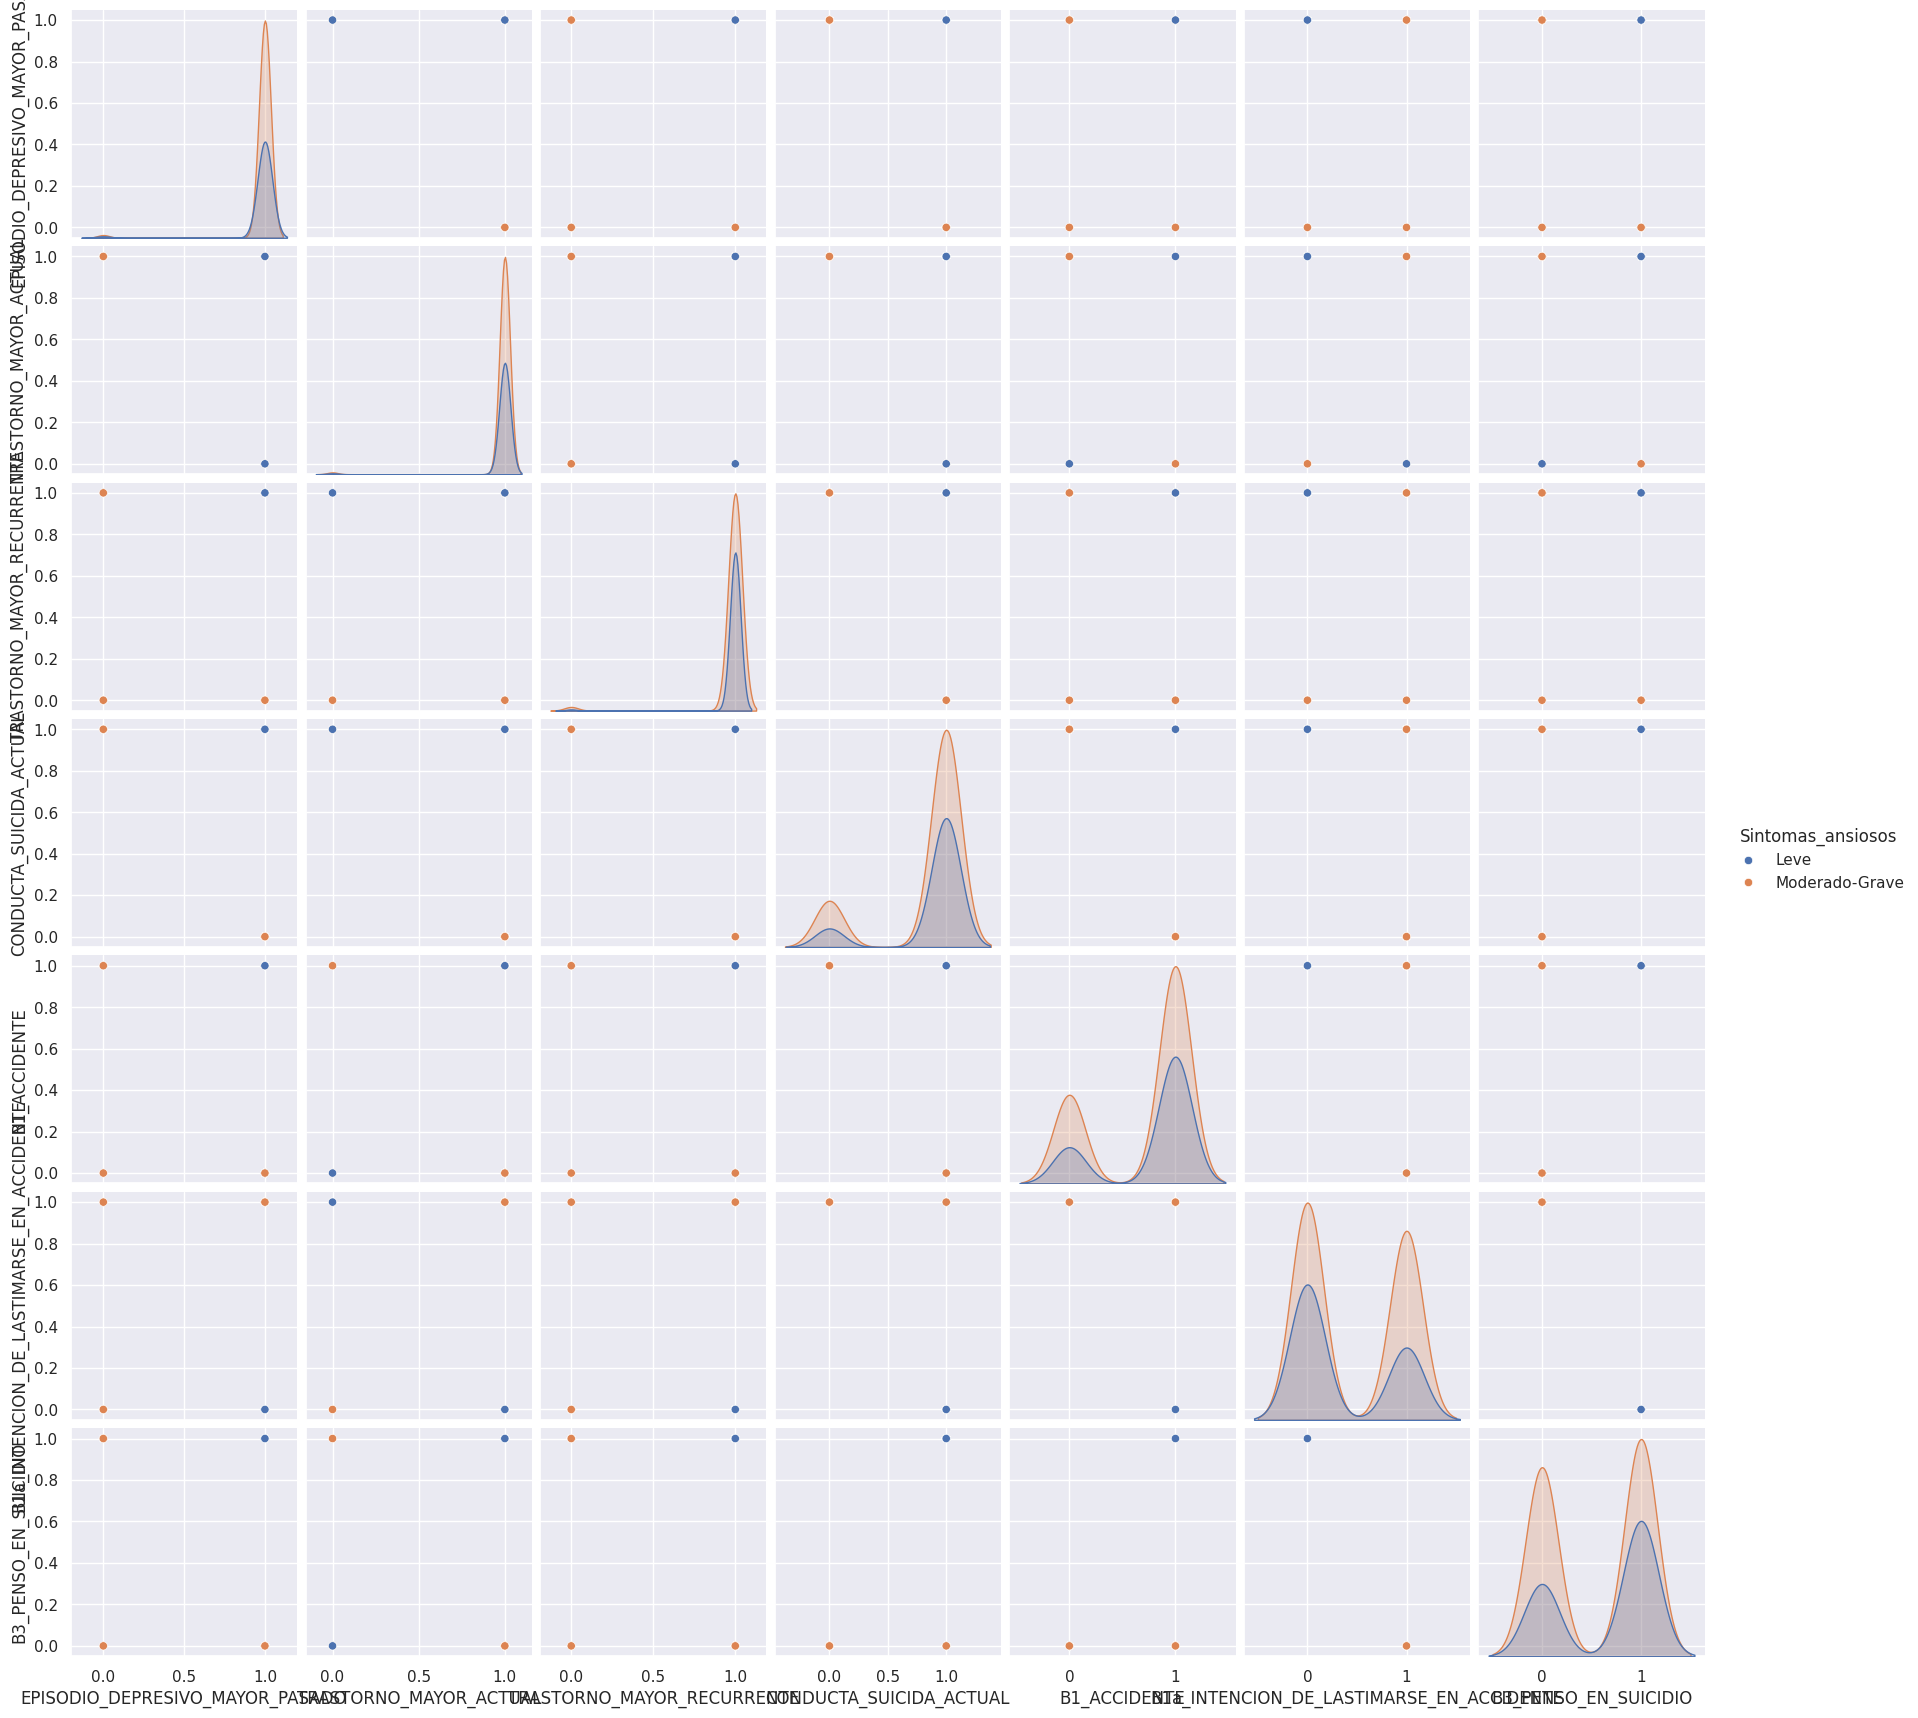

In [ ]:
# Creamos subconjunto para usar pairplot y ver relación entre variables numéricas de entrada y variable de salida.
pairplot_bool_df_2 = pairplot_bool_df.iloc[:, 10:].copy()
pairplot_bool_df_2['Sintomas_ansiosos'] = df['Sintomas_ansiosos']


# Creamos pairplot
sns.pairplot(pairplot_bool_df_2, hue='Sintomas_ansiosos');

Podemos observar en las distribución si hay diferencias para el valor Leve, Moderado-Grave de la variable "Sintomas_ansiosos" que es la variable de salida.<br>
Esto nos da un indicador de que posiblemente podamos encontrar un modelo para predecir la variable con las variables bool presentadas.

**Tablas de contingencia en heatmaps de las variables categóricas de entrada vs la variable de salida, "Síntomas ansiosos"**

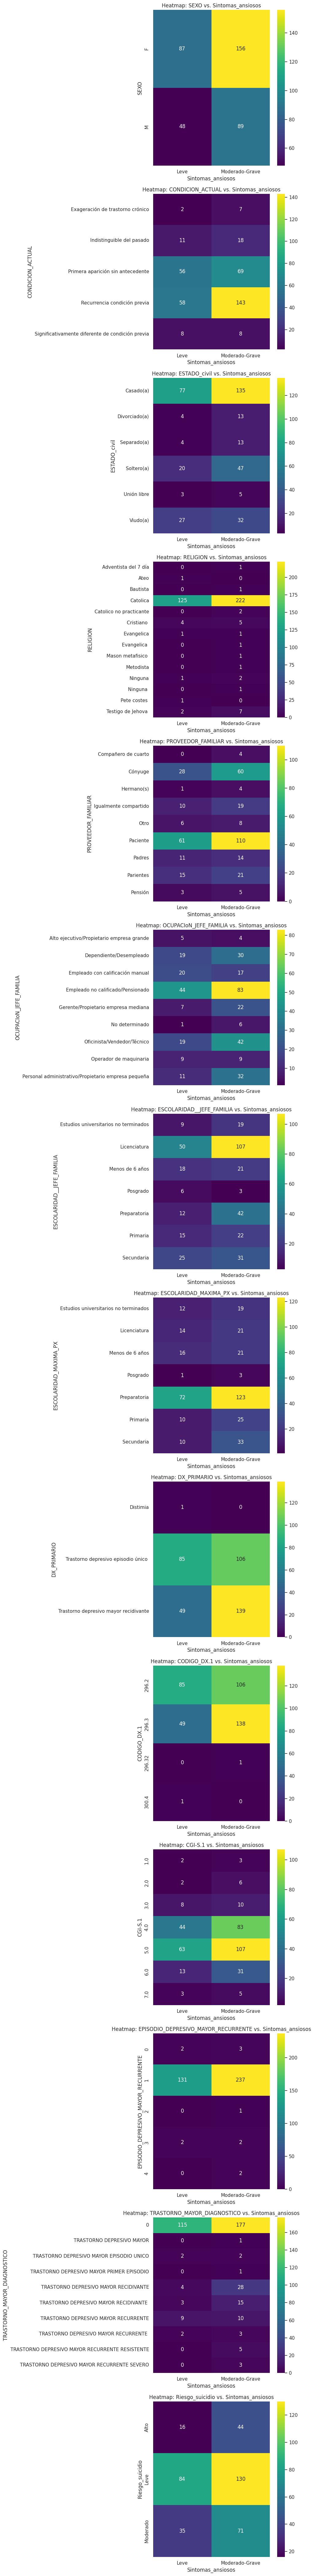

In [ ]:
# Creamos subconjunto para usar pairplot y ver relación entre variables numéricas de entrada y variable de salida.
category_df = df.select_dtypes(include=["category"])
category_df.columns

# Obtén una lista de todas las variables categóricas
variables_categoricas = category_df.columns[:-1]  # Excluyendo 'Sintomas_ansiosos'

# Crea una nueva figura para mostrar los heatmaps
plt.figure(figsize=(10, 6 * len(variables_categoricas)))

# Itera sobre cada variable categórica y crea un heatmap
for i, variable in enumerate(variables_categoricas):
    tabla_contingencia = pd.crosstab(category_df[variable], category_df['Sintomas_ansiosos'])
    plt.subplot(len(variables_categoricas), 1, i + 1)
    sns.heatmap(tabla_contingencia, cmap='viridis', annot=True, fmt='d')
    plt.title(f'Heatmap: {variable} vs. Sintomas_ansiosos')
    plt.xlabel('Sintomas_ansiosos')
    plt.ylabel(variable)

# Ajusta el espacio entre los heatmaps
plt.tight_layout()

# Muestra los heatmaps uno debajo del otro
plt.show()

Observamos que si existe relación entre las variables de entrada y la variable "síntomas ansiosos" ya que en las gráficas obsevamos que algunos de los valores de las variables de entrada resultan en un mayor número de casos de con síntomas ansiosos Moderado-Grave.

**Conclusión**

Después de revisar la relación entre las variables de entrada propuestas y la variable de salida consideramos continuar con la base como la tenemos.

### 4 Modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder

Observamos que la base con la que se entrenarán los modelos consta de 41 variables y 380 observaciones

In [ ]:
df.shape

(380, 41)

In [ ]:
df.head()

SEXO  EDAD_1era_visita                   CONDICION_ACTUAL  \
0    F                18  Primera aparición sin antecedente   
1    F                29  Primera aparición sin antecedente   
2    F                58          Indistinguible del pasado   
3    M                36  Primera aparición sin antecedente   
4    F                32  Primera aparición sin antecedente   

   EDAD_INICIO_1er_EPISODIO ESTADO_civil  RELIGION     PROVEEDOR_FAMILIAR  \
0                        18   Soltero(a)  Catolica                 Padres   
1                        27    Casado(a)  Catolica                Cónyuge   
2                        51   Soltero(a)  Catolica              Parientes   
3                        34    Casado(a)  Catolica                Cónyuge   
4                        31    Casado(a)  Catolica  Igualmente compartido   

                OCUPACIoN_JEFE_FAMILIA              ESCOLARIDAD__JEFE_FAMILIA  \
0     Empleado con calificación manual                             Secundaria   
1    Empleado no calificado/Pensionado                               Primaria   
2  Gerente/Propietario empresa mediana  Estudios universitarios no terminados   
3          Oficinista/Vendedor/Técnico                               Primaria   
4     Empleado con calificación manual                           Licenciatura   

  ESCOLARIDAD_MAXIMA_PX  ...  TRASTORNO_MAYOR_ACTUAL  \
0          Preparatoria  ...                    True   
1          Preparatoria  ...                    True   
2              Primaria  ...                    True   
3          Preparatoria  ...                    True   
4              Posgrado  ...                    True   

   TRASTORNO_MAYOR_RECURRENTE  TRASTORNO_MAYOR_DIAGNOSTICO  \
0                        True                            0   
1                        True                            0   
2                        True                            0   
3                        True                            0   
4                        True                            0   

  CONDUCTA_SUICIDA_ACTUAL B1_ACCIDENTE  \
0                    True        False   
1                    True        False   
2                    True         True   
3                    True         True   
4                    True         True   

  B1a_INTENCION_DE_LASTIMARSE_EN_ACCIDENTE  B3_PENSO_EN_SUICIDIO  \
0                                     True                 False   
1                                     True                 False   
2                                    False                  True   
3                                    False                  True   
4                                    False                  True   

   Puntaje_experto  Riesgo_suicidio  Sintomas_ansiosos  
0                7         Moderado               Leve  
1                7         Moderado     Moderado-Grave  
2                3             Leve     Moderado-Grave  
3                3             Leve               Leve  
4                3             Leve     Moderado-Grave  

[5 rows x 41 columns]

Para poder utilizar las variables no numéricas en los modelos utilizaremos LabelEncoder

In [ ]:
encoder = LabelEncoder()

variables = ['ESCOLARIDAD__JEFE_FAMILIA', 'ESCOLARIDAD_MAXIMA_PX', 'CGI-S.1', 'EPISODIO_DEPRESIVO_MAYOR_RECURRENTE', 'Riesgo_suicidio', 'Sintomas_ansiosos',
             'SEXO', 'CONDICION_ACTUAL', 'ESTADO_civil', 'RELIGION', 'PROVEEDOR_FAMILIAR', 'OCUPACIoN_JEFE_FAMILIA', 'DX_PRIMARIO', 'CODIGO_DX.1', 'TRASTORNO_MAYOR_DIAGNOSTICO']

# Aplicar el LabelEncoder a cada columna categórica
for column in variables:
    df[column] = encoder.fit_transform(df[column])

In [ ]:
#Mostramos que la codificación haya funcionado
df.head()

SEXO  EDAD_1era_visita  CONDICION_ACTUAL  EDAD_INICIO_1er_EPISODIO  \
0     0                18                 2                        18   
1     0                29                 2                        27   
2     0                58                 1                        51   
3     1                36                 2                        34   
4     0                32                 2                        31   

   ESTADO_civil  RELIGION  PROVEEDOR_FAMILIAR  OCUPACIoN_JEFE_FAMILIA  \
0             3         3                   6                       2   
1             0         3                   1                       3   
2             3         3                   7                       4   
3             0         3                   1                       6   
4             0         3                   3                       2   

   ESCOLARIDAD__JEFE_FAMILIA  ESCOLARIDAD_MAXIMA_PX  ...  \
0                          6                      4  ...   
1                          5                      4  ...   
2                          0                      5  ...   
3                          5                      4  ...   
4                          1                      3  ...   

   TRASTORNO_MAYOR_ACTUAL  TRASTORNO_MAYOR_RECURRENTE  \
0                    True                        True   
1                    True                        True   
2                    True                        True   
3                    True                        True   
4                    True                        True   

   TRASTORNO_MAYOR_DIAGNOSTICO  CONDUCTA_SUICIDA_ACTUAL  B1_ACCIDENTE  \
0                            0                     True         False   
1                            0                     True         False   
2                            0                     True          True   
3                            0                     True          True   
4                            0                     True          True   

   B1a_INTENCION_DE_LASTIMARSE_EN_ACCIDENTE  B3_PENSO_EN_SUICIDIO  \
0                                      True                 False   
1                                      True                 False   
2                                     False                  True   
3                                     False                  True   
4                                     False                  True   

   Puntaje_experto  Riesgo_suicidio  Sintomas_ansiosos  
0                7                2                  0  
1                7                2                  1  
2                3                1                  1  
3                3                1                  0  
4                3                1                  1  

[5 rows x 41 columns]

Vamos a probar con modelos sencillos únicamente para ver que resultados obtenemos y cuál es el mejor de los modelos.

In [ ]:
def lista_modelos():
    modelos = list()
    nombres = list()

    #Para regresión logistica con parámetros estándar
    modelos.append(LogisticRegression(solver='liblinear'))
    nombres.append("Reg")

    #para árboles de decisión
    modelos.append(DecisionTreeClassifier())
    nombres.append("Arb")

    #Bosques aleatorios
    modelos.append(RandomForestClassifier())
    nombres.append("bosq")

    #Red Neuronal Artificial (Perceptrón Lineal Multicapa)
    modelos.append(MLPClassifier(hidden_layer_sizes=(30,), max_iter=3000))
    nombres.append('MLP')

    #Máquina de Vector Soporte
    modelos.append(SVC(gamma='scale'))
    nombres.append('SVM')

    #k-Vecinos más cercanos
    modelos.append(KNeighborsClassifier())
    nombres.append('kNN')

    modelos.append(XGBClassifier())
    nombres.append("XBG")

    return modelos, nombres

In [ ]:
#Generamos la base con las características y la variable de salida
X = df.drop(columns=['Sintomas_ansiosos'])
Y = df['Sintomas_ansiosos']

Aunque nuestra base es pequeña, debemos de dividirla para obtener datos de entrenamiento y validación. Así, usaremos el 80% de los datos para entrenar los modelos.

In [ ]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, train_size = 0.8, random_state = 0)

Como tenemos una cantidad pequeña de datos, utilizaremos validación cruzada para realizar el entrenamiento de los modelos, y así, poder tener una mayor certeza en las métricas obtenidas.

In [ ]:
modelos, nombres = lista_modelos()
resultados = list()

for i in range(len(modelos)):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
    scores = cross_val_score(modelos[i], Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)
    resultados.append(scores)
    print('>> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))

>> Reg: 0.584 (0.071)
>> Arb: 0.574 (0.057)
>> bosq: 0.653 (0.035)
>> MLP: 0.601 (0.059)
>> SVM: 0.640 (0.007)
>> kNN: 0.590 (0.041)
>> XBG: 0.635 (0.029)


Si bien, la tabla anterior muestra la media y la desviación obtenida por cada uno de los modelos al ser entrenados multiples veces en la validación cruzada, siempre es bueno ver gráficamente el resultado de todos los pasos, y así, observar que tan alejados están los resultados entre si. Para ello, mostraremos los resultados en gráficas de caja.

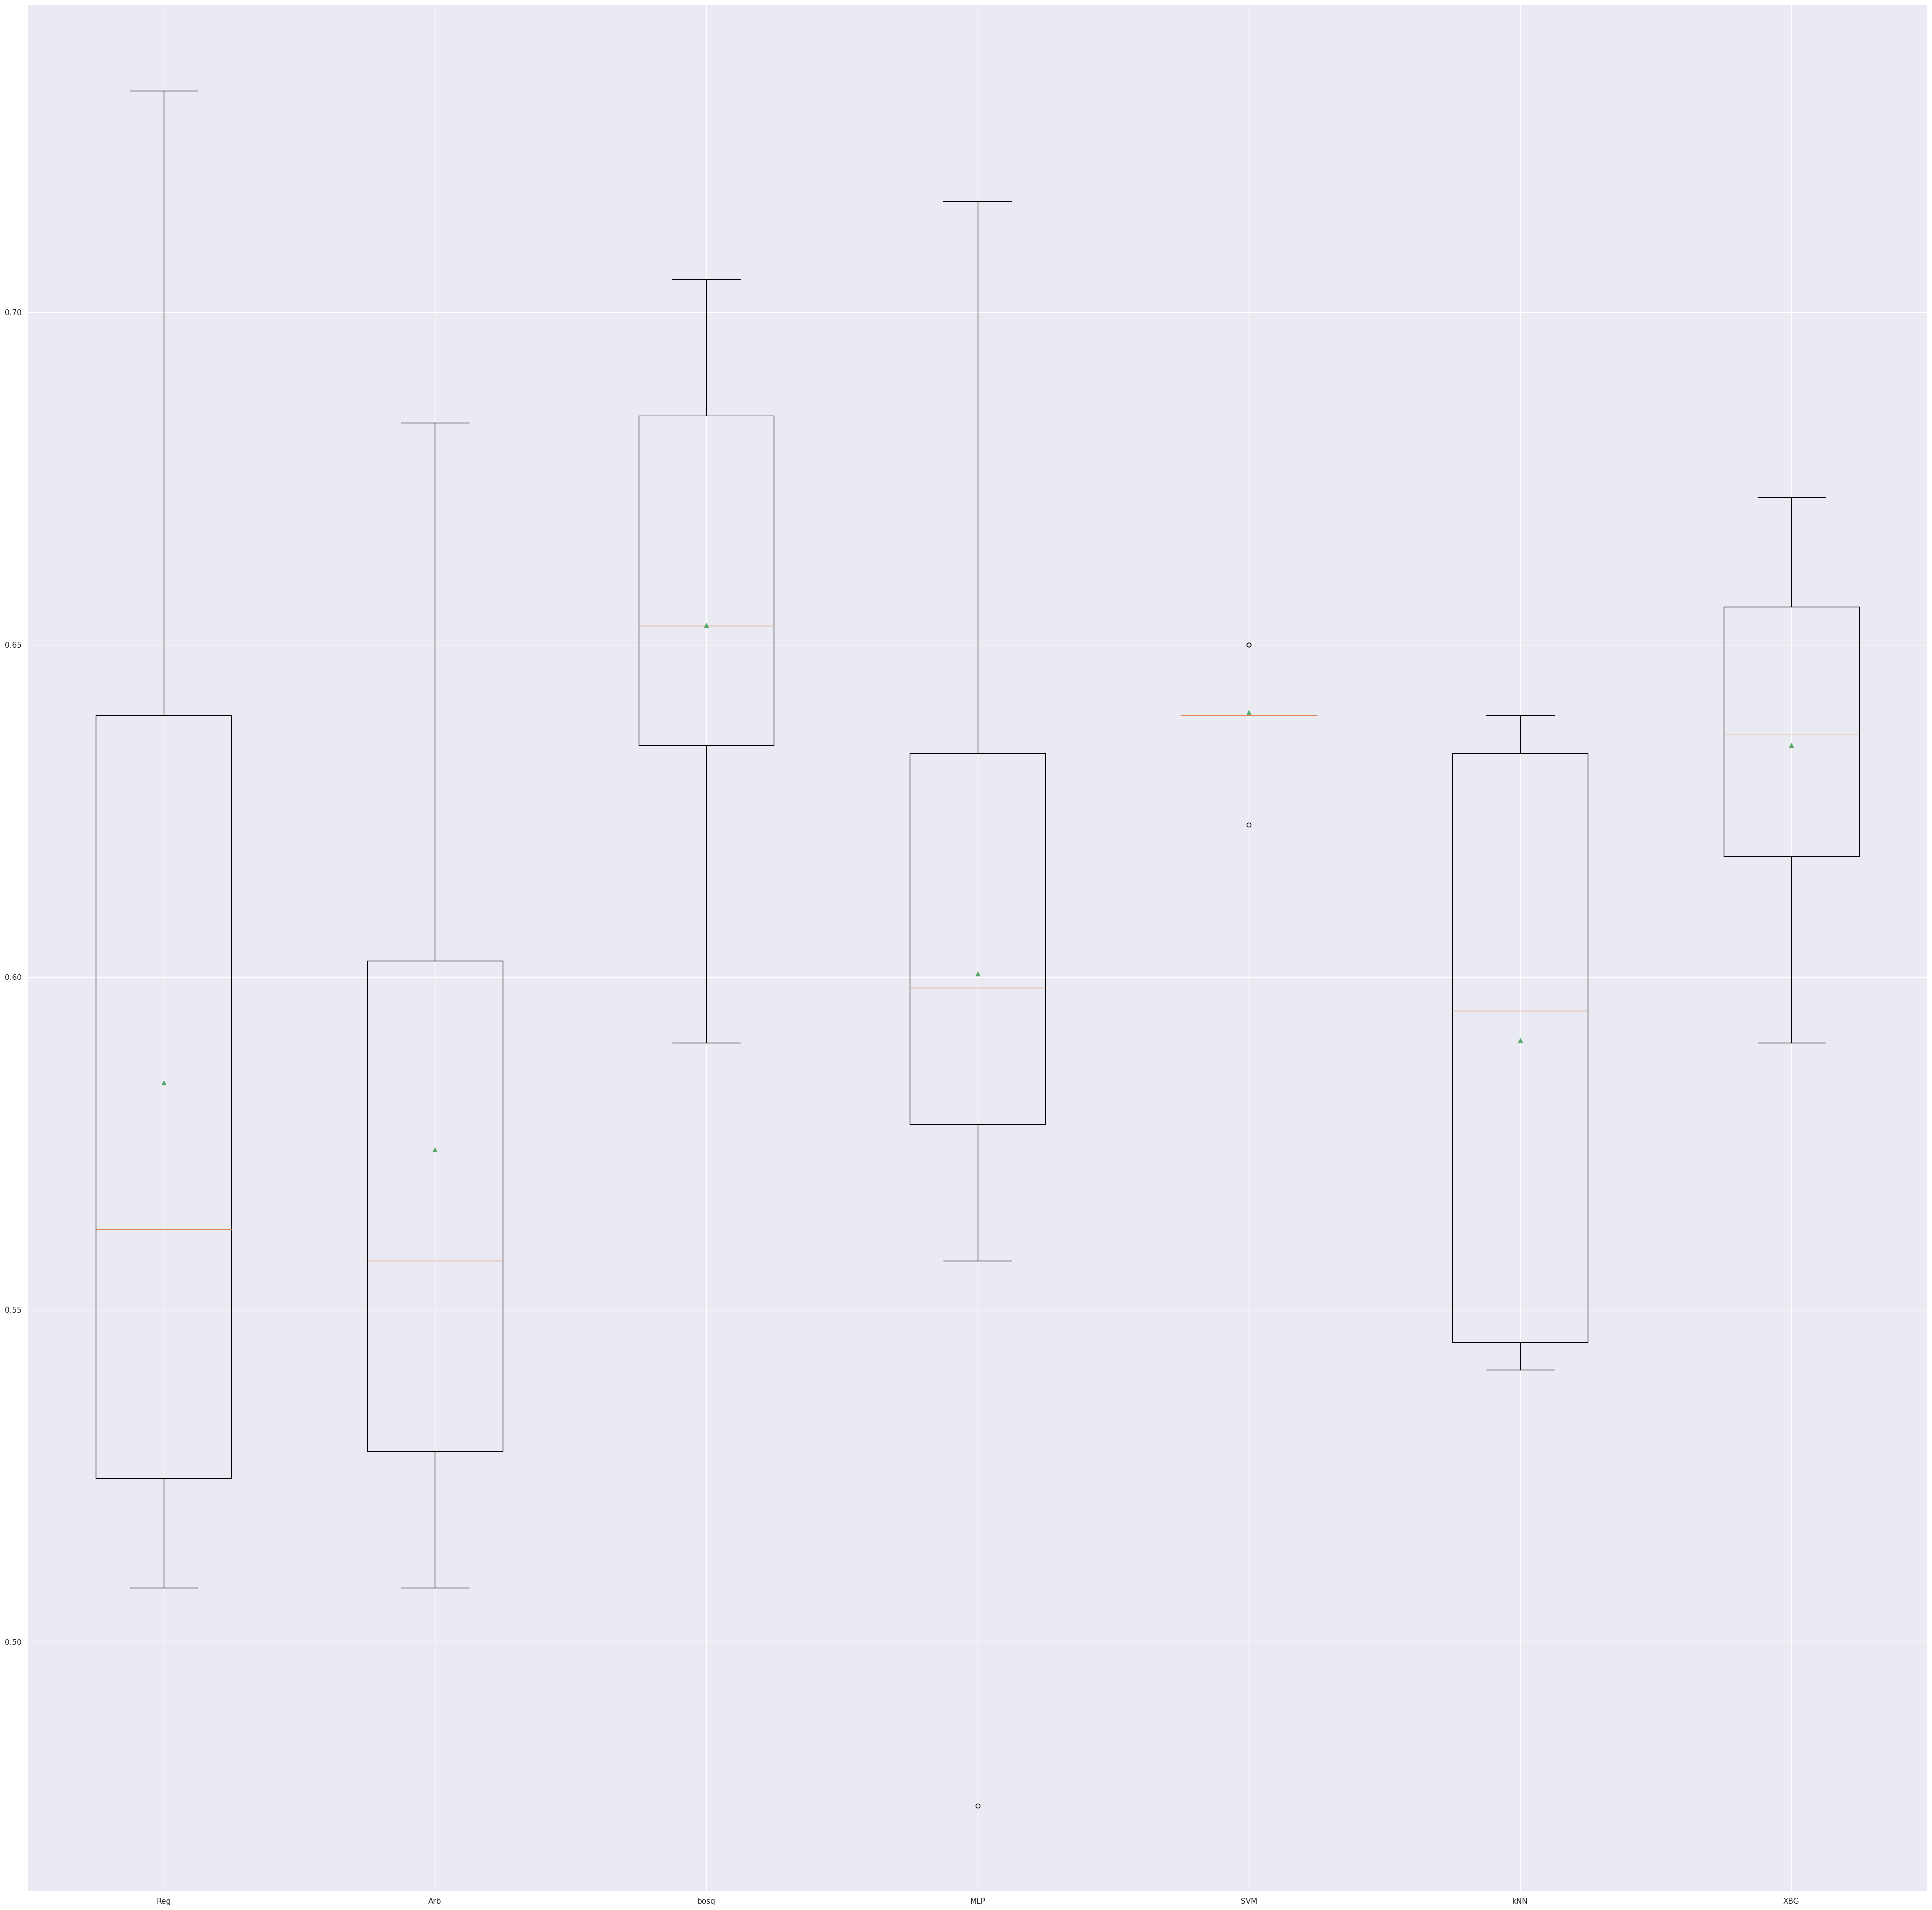

In [ ]:
plt.boxplot(resultados, labels = nombres, showmeans = True)
plt.show()

Ahora veremos que tan bien predicen los modelos utilizando los datos de prueba.

In [ ]:
modelos, nombres = lista_modelos()
resultados = list()

for i in range(len(modelos)):
    modelos[i].fit(Xtv, np.ravel(ytv))
    y_pred = modelos[i].predict(Xtest)
    f1 = f1_score(ytest,y_pred)
    cm = confusion_matrix(ytest, y_pred)
    print('>> %s:' % nombres[i])
    print('F1 Score: %.3f' % f1)
    print('Confusion Matrix:\n', cm)

>> Reg:
F1 Score: 0.679
Confusion Matrix:
 [[ 6 20]
 [14 36]]
>> Arb:
F1 Score: 0.667
Confusion Matrix:
 [[14 12]
 [19 31]]
>> bosq:
F1 Score: 0.757
Confusion Matrix:
 [[ 7 19]
 [ 8 42]]
>> MLP:
F1 Score: 0.598
Confusion Matrix:
 [[ 8 18]
 [21 29]]
>> SVM:
F1 Score: 0.794
Confusion Matrix:
 [[ 0 26]
 [ 0 50]]
>> kNN:
F1 Score: 0.704
Confusion Matrix:
 [[ 6 20]
 [12 38]]
>> XBG:
F1 Score: 0.743
Confusion Matrix:
 [[10 16]
 [11 39]]


Ahora, nos enfocamos solo en los dos modelos que obtuvieron un mejor equilibrio entre la media y la desviación de la métrica de evaluación accuracy.

#### 4.1 XGBClassifier

Para intentar evitar el sobreajuste del modelo, limitaremos la profundidad de los estimadores a 5 y utilizaremos 200 de ellos.

In [ ]:
modelo_xgb = XGBClassifier(random_state=0, max_depth = 5, learning_rate=0.1,n_estimators=200)
modelo_xgb.fit(Xtv, np.ravel(ytv))

y_train_pred = modelo_xgb.predict(Xtv)

# métricas para el conjunto de entrenamiento
f1_train = f1_score(ytv, y_train_pred)
cm_train = confusion_matrix(ytv, y_train_pred)
accuracy_train = accuracy_score(ytv, y_train_pred)
report_train = classification_report(ytv, y_train_pred)

print('--- Métricas en el Conjunto de Entrenamiento ---')
print('F1 Score: %.3f' % f1_train)
print('Accuracy: %.3f' % accuracy_train)
print('Confusion Matrix:\n', cm_train)
print('Classification Report:\n', report_train)


y_pred = modelo_xgb.predict(Xtest)

# métricas para el conjunto de prueba
f1 = f1_score(ytest, y_pred)
cm = confusion_matrix(ytest, y_pred)
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

print('--- Métricas en el Conjunto de Prueba ---')
print('F1 Score: %.3f' % f1)
print('Accuracy: %.3f' % accuracy)
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', report)

--- Métricas en el Conjunto de Entrenamiento ---
F1 Score: 1.000
Accuracy: 1.000
Confusion Matrix:
 [[109   0]
 [  0 195]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       195

    accuracy                           1.00       304
   macro avg       1.00      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304

--- Métricas en el Conjunto de Prueba ---
F1 Score: 0.736
Accuracy: 0.632
Confusion Matrix:
 [[ 9 17]
 [11 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.35      0.39        26
           1       0.70      0.78      0.74        50

    accuracy                           0.63        76
   macro avg       0.57      0.56      0.56        76
weighted avg       0.61      0.63      0.62        76



Como el objetivo es ver la relación entre la variable de salida y el resto de las características, obtenemos ahora las variables más mportantes para el modelo, en una lista ordenada y después graficamente

In [ ]:
importances = modelo_xgb.feature_importances_

# Creamos un DataFrame únicamente para que la visualización esté más ordenada
feature_importance_df = pd.DataFrame({
    'Feature': Xtv.columns,
    'Importance': importances
})

# Ordenamos el DataFrame por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                        Feature  Importance
24                 A3f_DIFICULTAD_CONCENTRACION    0.088613
13                                  DX_PRIMARIO    0.068033
36     B1a_INTENCION_DE_LASTIMARSE_EN_ACCIDENTE    0.049777
4                                  ESTADO_civil    0.045297
9                         ESCOLARIDAD_MAXIMA_PX    0.044965
39                              Riesgo_suicidio    0.044697
35                                 B1_ACCIDENTE    0.043625
19                       A3a_CAMBIO_PESO_UN_MES    0.041258
10                       AnioS_ESTUDIO_PACIENTE    0.040175
11                                      MENARCA    0.039862
8                     ESCOLARIDAD__JEFE_FAMILIA    0.036723
3                      EDAD_INICIO_1er_EPISODIO    0.034893
1                              EDAD_1era_visita    0.034730
0                                          SEXO    0.034570
16                                  MADRS_TOTAL    0.034355
6                            PROVEEDOR_F

<Figure size 1000x800 with 0 Axes>

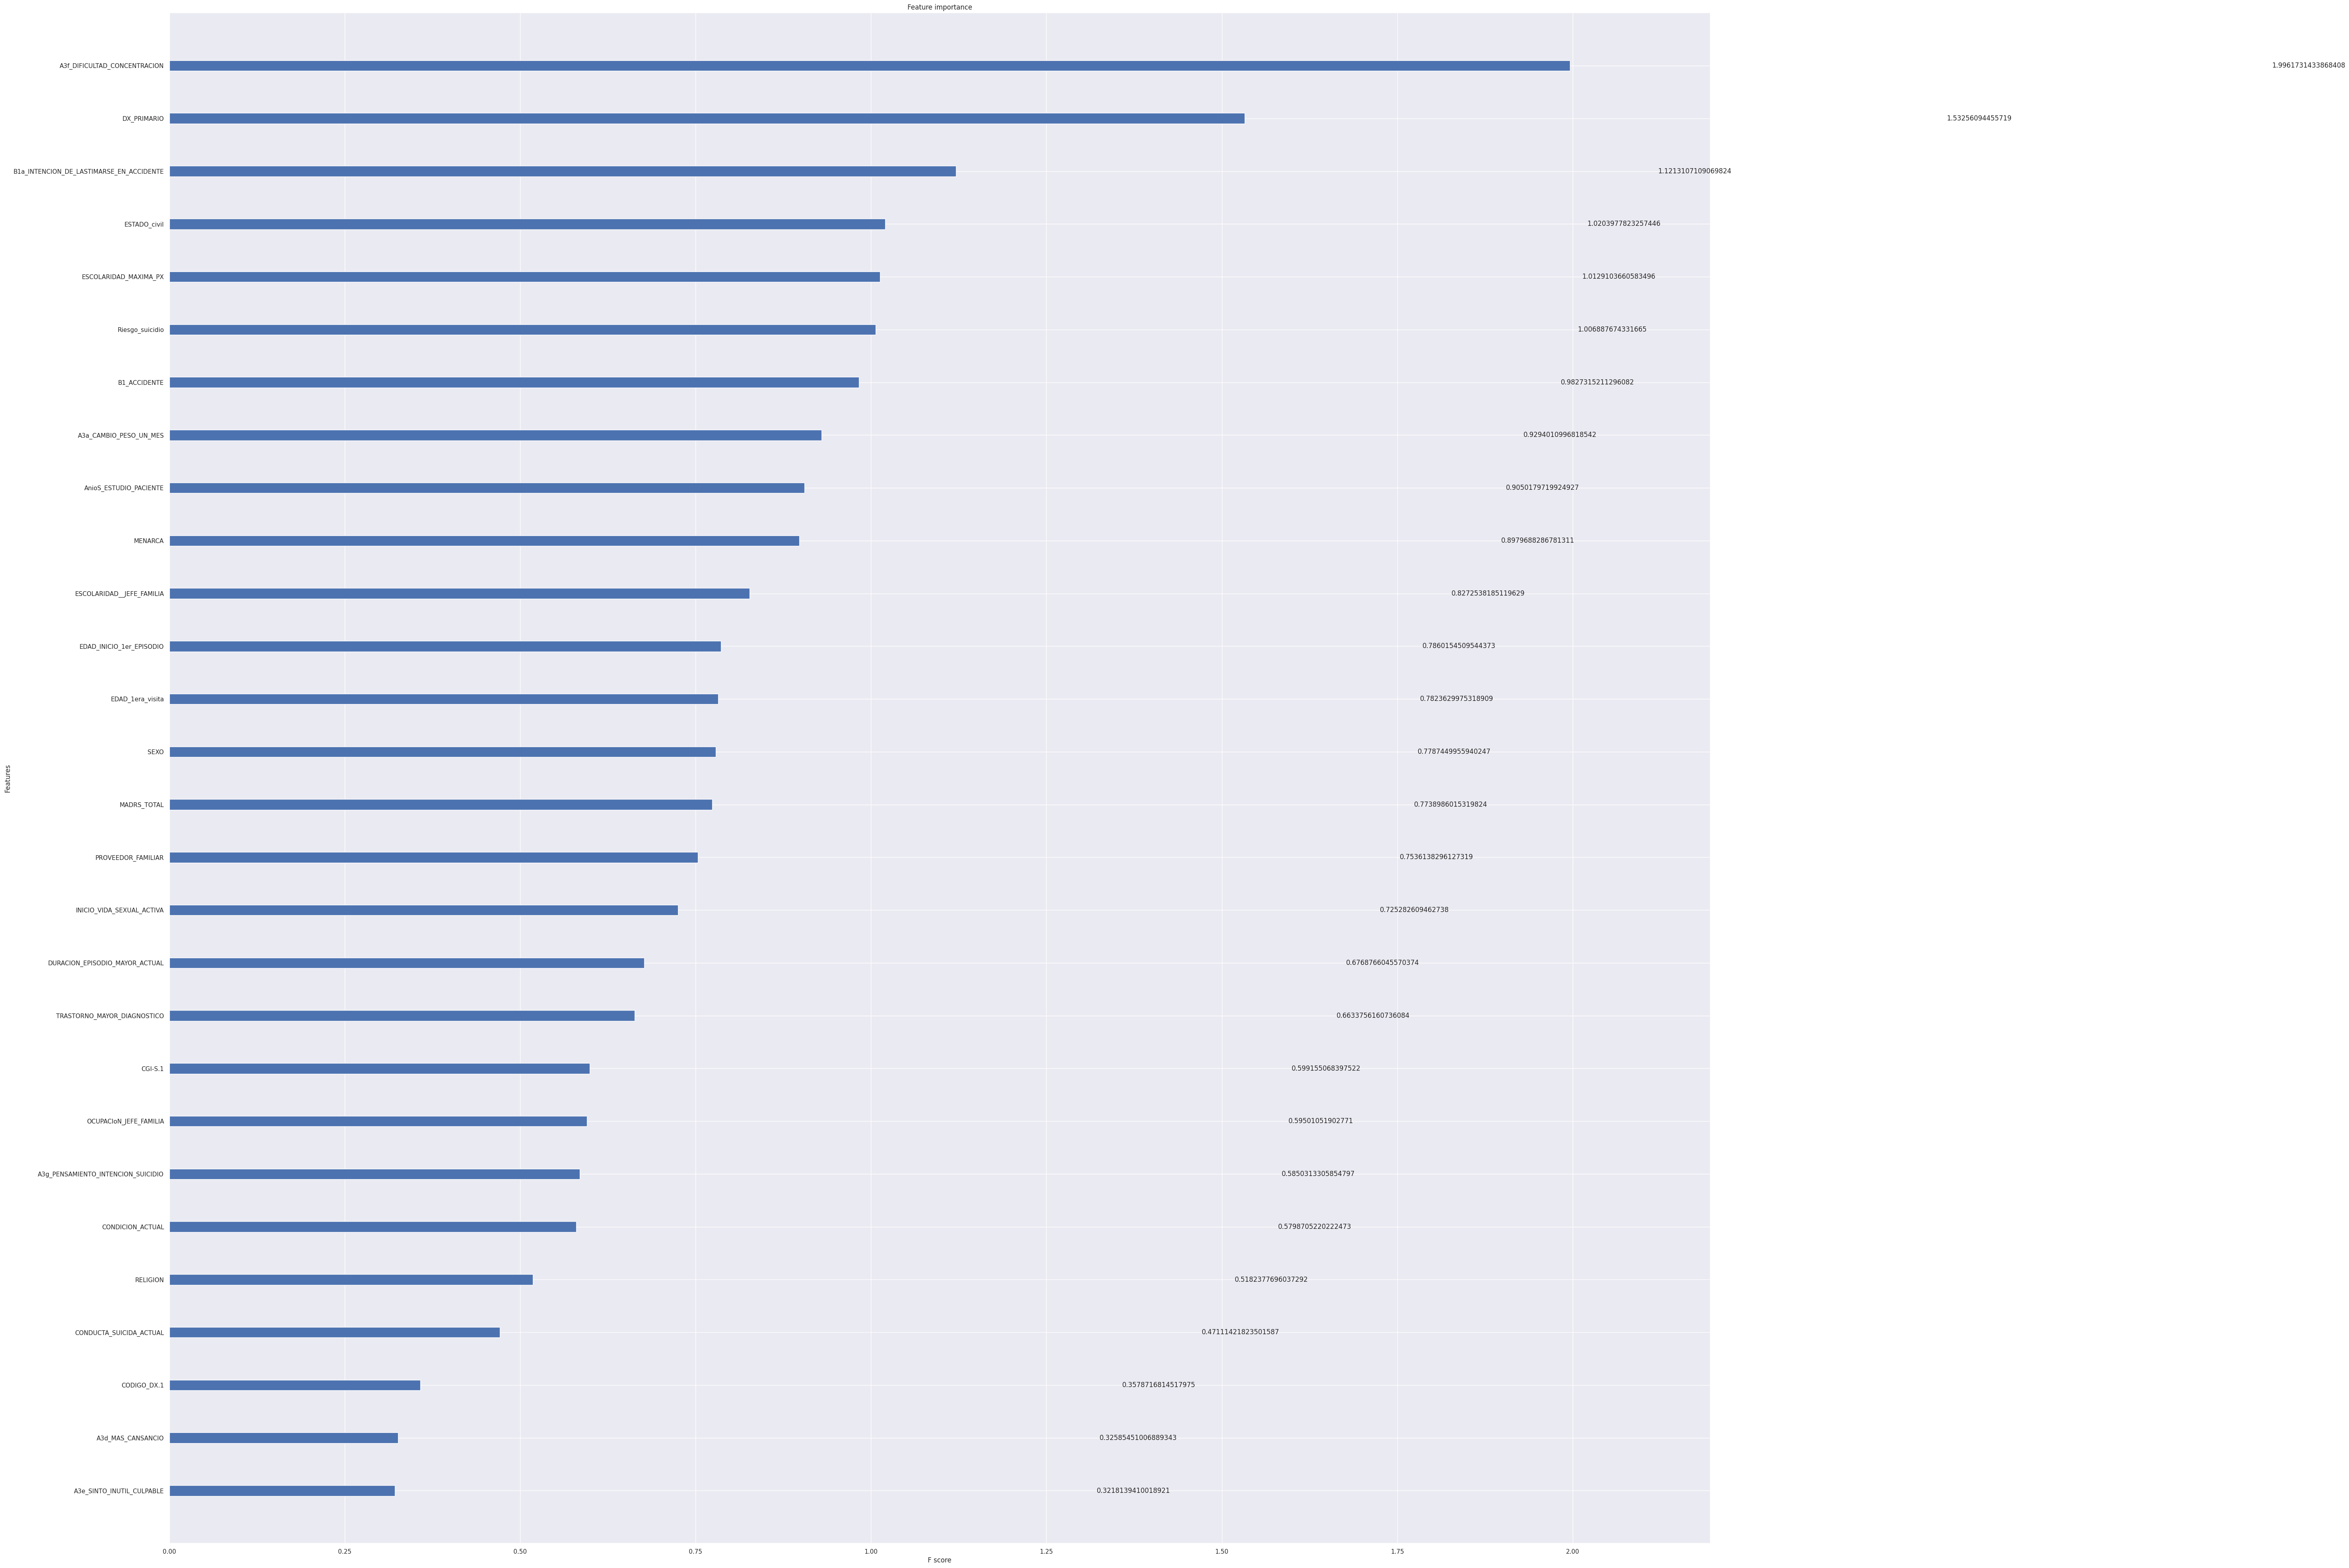

In [ ]:
# Lo mismo pero de manera visual
plt.figure(figsize=(10, 8))
plot_importance(modelo_xgb, importance_type='gain')
plt.show()

#### 4.2 RandomForest

Para intentar evitar el sobreajuste del modelo, limitaremos la profundidad de los estimadores a 5 y utilizaremos 200 de ellos.

In [ ]:
modelo_rf = RandomForestClassifier(random_state=0, max_depth = 5, n_estimators=200)
modelo_rf.fit(Xtv, np.ravel(ytv))

y_train_pred = modelo_rf.predict(Xtv)

# métricas para el conjunto de entrenamiento
f1_train = f1_score(ytv, y_train_pred)
cm_train = confusion_matrix(ytv, y_train_pred)
accuracy_train = accuracy_score(ytv, y_train_pred)
report_train = classification_report(ytv, y_train_pred)

print('--- Métricas en el Conjunto de Entrenamiento ---')
print('F1 Score: %.3f' % f1_train)
print('Accuracy: %.3f' % accuracy_train)
print('Confusion Matrix:\n', cm_train)
print('Classification Report:\n', report_train)


y_pred = modelo_rf.predict(Xtest)

# métricas para el conjunto de prueba
f1 = f1_score(ytest, y_pred)
cm = confusion_matrix(ytest, y_pred)
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

print('--- Métricas en el Conjunto de Prueba ---')
print('F1 Score: %.3f' % f1)
print('Accuracy: %.3f' % accuracy)
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', report)

--- Métricas en el Conjunto de Entrenamiento ---
F1 Score: 0.896
Accuracy: 0.852
Confusion Matrix:
 [[ 65  44]
 [  1 194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.60      0.74       109
           1       0.82      0.99      0.90       195

    accuracy                           0.85       304
   macro avg       0.90      0.80      0.82       304
weighted avg       0.88      0.85      0.84       304

--- Métricas en el Conjunto de Prueba ---
F1 Score: 0.724
Accuracy: 0.579
Confusion Matrix:
 [[ 2 24]
 [ 8 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.08      0.11        26
           1       0.64      0.84      0.72        50

    accuracy                           0.58        76
   macro avg       0.42      0.46      0.42        76
weighted avg       0.49      0.58      0.51        76



Al igual que para XGB, obtenemos ahora las variables más mportantes para el modelo, en una lista ordenada.

In [ ]:
importances = modelo_rf.feature_importances_

# Crear un DataFrame para visualizar mejor
feature_importance_df = pd.DataFrame({
    'Feature': Xtv.columns,
    'Importance': importances
})

# Ordenar el DataFrame por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                        Feature  Importance
3                      EDAD_INICIO_1er_EPISODIO    0.099742
1                              EDAD_1era_visita    0.099551
16                                  MADRS_TOTAL    0.093604
10                       AnioS_ESTUDIO_PACIENTE    0.073432
12                    INICIO_VIDA_SEXUAL_ACTIVA    0.059157
30               DURACION_EPISODIO_MAYOR_ACTUAL    0.049935
9                         ESCOLARIDAD_MAXIMA_PX    0.047589
7                        OCUPACIoN_JEFE_FAMILIA    0.038120
8                     ESCOLARIDAD__JEFE_FAMILIA    0.037434
11                                      MENARCA    0.037250
6                            PROVEEDOR_FAMILIAR    0.034555
13                                  DX_PRIMARIO    0.034005
4                                  ESTADO_civil    0.031264
33                  TRASTORNO_MAYOR_DIAGNOSTICO    0.029383
15                                      CGI-S.1    0.027749
39                              Riesgo_s

#### 4. DecisionTree

Aunque el árbol de decisión fue uno de los modelos que mostró una mayor desviación estándar en su rendimiento al entrenarse en la validación cruzada, este modelo tiene la ventaja de que podemos ver visualmente el entrenamiento "paso por paso" del modelo. Por lo anterior, también decidimos mostrarlo

In [ ]:
modelo1_df = DecisionTreeClassifier(random_state=0, min_samples_split = 10, max_depth = 5)
modelo1_df.fit(Xtv, np.ravel(ytv))


y_train_pred = modelo1_df.predict(Xtv)

# métricas para el conjunto de entrenamiento
f1_train = f1_score(ytv, y_train_pred)
cm_train = confusion_matrix(ytv, y_train_pred)
accuracy_train = accuracy_score(ytv, y_train_pred)
report_train = classification_report(ytv, y_train_pred)

print('--- Métricas en el Conjunto de Entrenamiento ---')
print('F1 Score: %.3f' % f1_train)
print('Accuracy: %.3f' % accuracy_train)
print('Confusion Matrix:\n', cm_train)
print('Classification Report:\n', report_train)

y_pred = modelo1_df.predict(Xtest)

# métricas para el conjunto de prueba
f1 = f1_score(ytest, y_pred)
cm = confusion_matrix(ytest, y_pred)
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

print('--- Métricas en el Conjunto de Prueba ---')
print('F1 Score: %.3f' % f1)
print('Accuracy: %.3f' % accuracy)
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', report)

--- Métricas en el Conjunto de Entrenamiento ---
F1 Score: 0.818
Accuracy: 0.766
Confusion Matrix:
 [[ 73  36]
 [ 35 160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.67       109
           1       0.82      0.82      0.82       195

    accuracy                           0.77       304
   macro avg       0.75      0.75      0.75       304
weighted avg       0.77      0.77      0.77       304

--- Métricas en el Conjunto de Prueba ---
F1 Score: 0.635
Accuracy: 0.500
Confusion Matrix:
 [[ 5 21]
 [17 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.19      0.21        26
           1       0.61      0.66      0.63        50

    accuracy                           0.50        76
   macro avg       0.42      0.43      0.42        76
weighted avg       0.48      0.50      0.49        76



In [ ]:
# Exportamos el árbol a un archivo dot
export_graphviz(modelo1_df, out_file='tree.dot',
                feature_names=Xtv.columns,
                class_names=['Class 0', 'Class 1'],  # Ajusta según tus clases
                rounded=True, proportion=False,
                precision=2, filled=True)

# Necesitamos graphviz para visualizar el archivo dot
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).view()

'Source.gv.pdf'

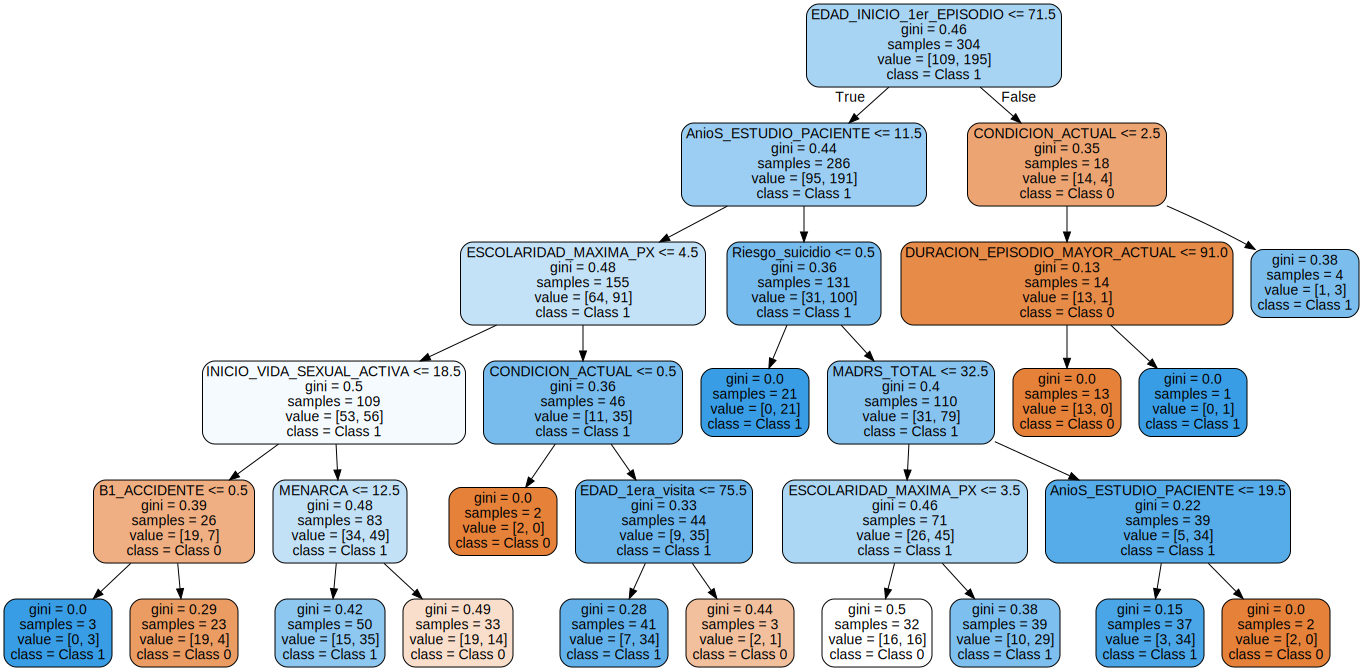

In [ ]:
# Ahora creamos el gráfico
dot_data = export_graphviz(modelo1_df, out_file=None,
                           feature_names=Xtv.columns,
                           class_names=['Class 0', 'Class 1'],  # Ajusta según tus clases
                           rounded=True, proportion=False,
                           precision=2, filled=True)

# Y lo mostramos
grafica = graphviz.Source(dot_data)
display(grafica)

In [ ]:
importances = modelo1_df.feature_importances_

# Crear un DataFrame para visualizar mejor
feature_importance_df = pd.DataFrame({
    'Feature': Xtv.columns,
    'Importance': importances
})

# Ordenar el DataFrame por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                        Feature  Importance
10                       AnioS_ESTUDIO_PACIENTE    0.168206
3                      EDAD_INICIO_1er_EPISODIO    0.148534
9                         ESCOLARIDAD_MAXIMA_PX    0.133323
2                              CONDICION_ACTUAL    0.116748
12                    INICIO_VIDA_SEXUAL_ACTIVA    0.090186
35                                 B1_ACCIDENTE    0.079998
11                                      MENARCA    0.066775
16                                  MADRS_TOTAL    0.062980
39                              Riesgo_suicidio    0.061863
30               DURACION_EPISODIO_MAYOR_ACTUAL    0.041017
1                              EDAD_1era_visita    0.030371
34                      CONDUCTA_SUICIDA_ACTUAL    0.000000
36     B1a_INTENCION_DE_LASTIMARSE_EN_ACCIDENTE    0.000000
37                         B3_PENSO_EN_SUICIDIO    0.000000
24                 A3f_DIFICULTAD_CONCENTRACION    0.000000
33                  TRASTORNO_MAYOR_DIAG

Si tomamos únicamente las 5 características que más aportan a estos 3 modelos, observamos que estas se refieren a: f_DIFICULTAD_CONCENTRACION, DX_PRIMARIO, B1a_INTENCION_DE_LASTIMARSE_EN_ACCIDENTE, ESTADO_civil, ESCOLARIDAD_MAXIMA_PX,
EDAD_INICIO_1er_EPISODIO, EDAD_1era_visita, MADRS_TOTAL, INICIO_VIDA_SEXUAL_ACTIVA, AnioS_ESTUDIO_PACIENTE, CONDICION_ACTUAL.

Cabe señalar que, mientras que para árboles de decisión y bosques aleatorios las variables son prácticamente las mismas, esto difiere con respecto a XGB